**LIBRARIES**

In [1]:
import pandas as pd                                     # load the data (.csv)
import geopandas as gpd                                 # load data (.shp)
 
import matplotlib.tri as mtri                           # generate unstructured grid object
import matplotlib.pyplot as plt                         # for plotting a contour fill

from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import numpy as np                                      # create color map levels

import imageio                                          # create an animation (.gif)

**LOAD THE DATASET**

In [2]:
# unstructured grid
gridPoint = pd.read_csv('DATA/grid_point.csv')
gridTriangles = pd.read_csv('DATA/grid_triangle.csv', header=None)

# sea water elevation every 1 hour (FVCOM simulation)
waterElevation = pd.read_csv('DATA/zetaPlot.csv', header=None)

# islands
shpFile = gpd.read_file('DATA/bali_and_java_for_ploting.shp')

**PLOT ONE DATA**

In [3]:
# check the number of data
waterElevation.shape

(9016, 100)

In [4]:
# unstructured triangular grid object
triang = mtri.Triangulation(gridPoint['x'], gridPoint['y'], triangles=gridTriangles-1)

In [5]:
# color level for color map in contour fill plot
colorLevels = np.linspace(-1.1, 1.1, 21)

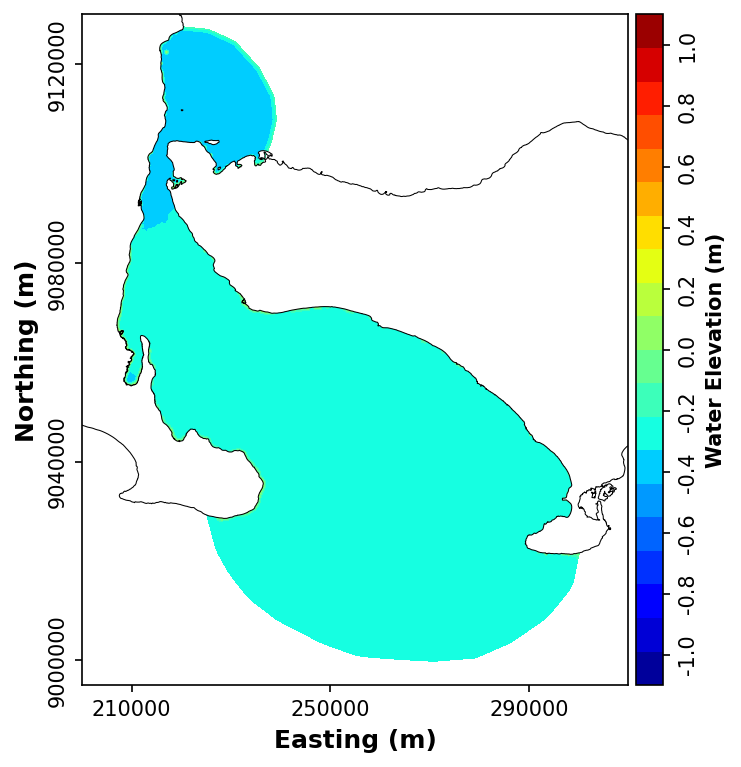

In [6]:
fig, ax = plt.subplots(figsize=(5,7), dpi=150)

im = ax.tricontourf(triang, waterElevation[0], cmap='jet', levels=colorLevels)
shpFile.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

ax.set_xlim(200000, 310000)
ax.set_ylim(8995000, 9130000)

ax.set_xlabel('Easting (m)', fontweight='bold', fontsize=12)
ax.set_ylabel('Northing (m)', fontweight='bold', fontsize=12)

ax.set_xticks(ticks=[210000, 250000, 290000])
ax.set_yticks(ticks=[9000000, 9040000, 9080000, 9120000])
ax.set_yticklabels(ax.get_yticks(), rotation='vertical', va='center')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(mappable=im, cax=cax)
cbar.ax.set_yticks(ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.ax.set_yticklabels(cbar.ax.get_yticks(), rotation='vertical', va='center')
cbar.ax.set_ylabel('Water Elevation (m)', fontweight='bold')

plt.show()

**CREATE AN ANIMATION: `imageio`**

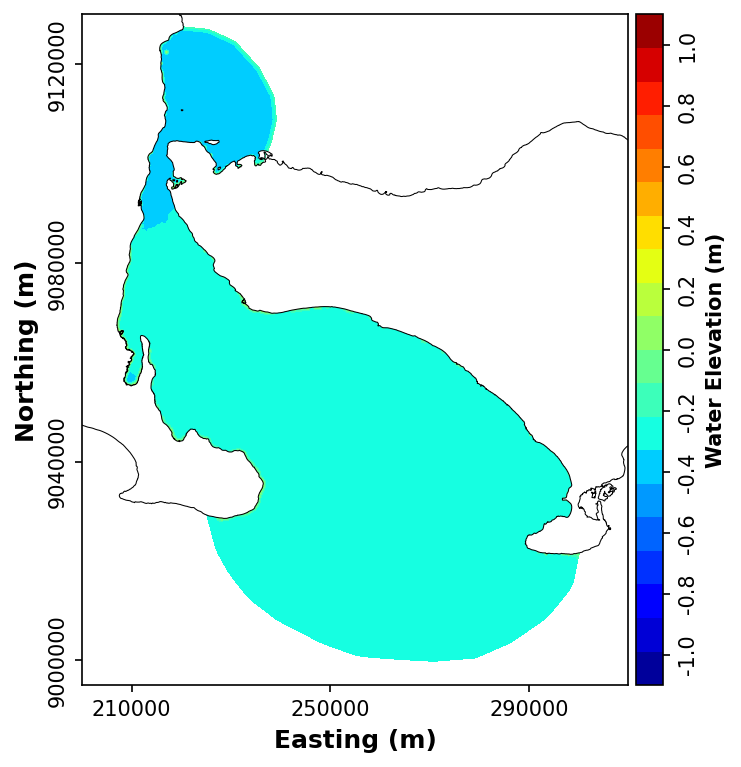

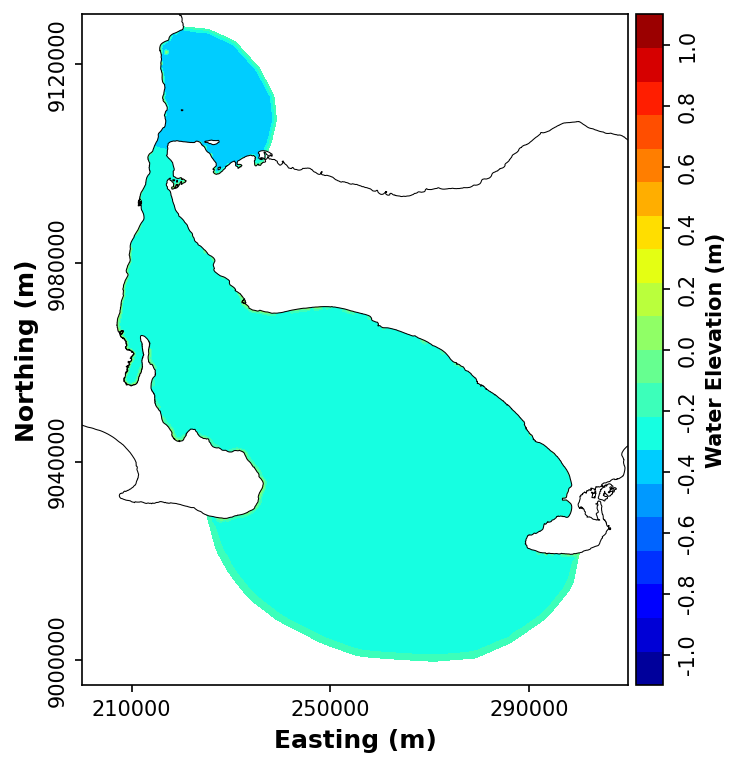

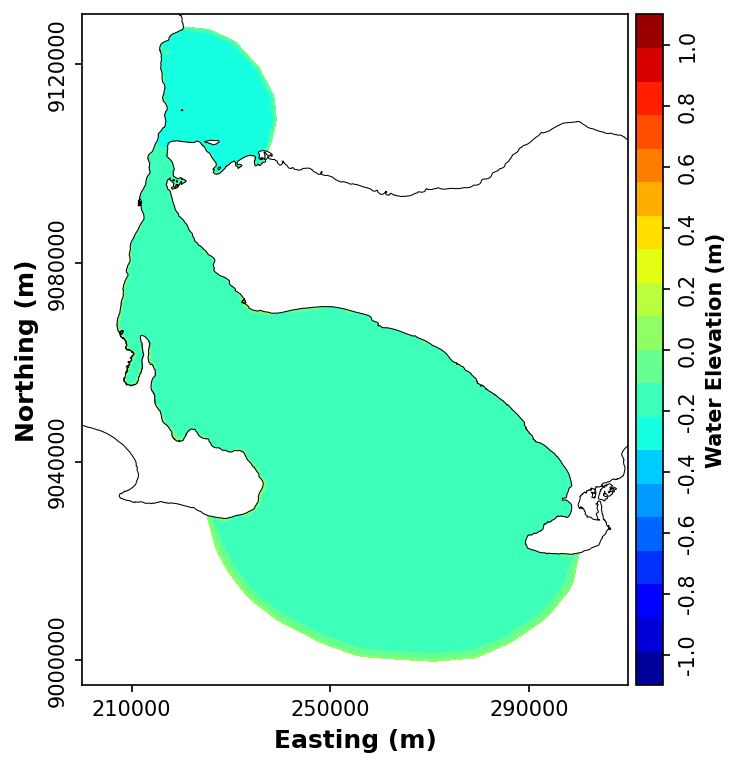

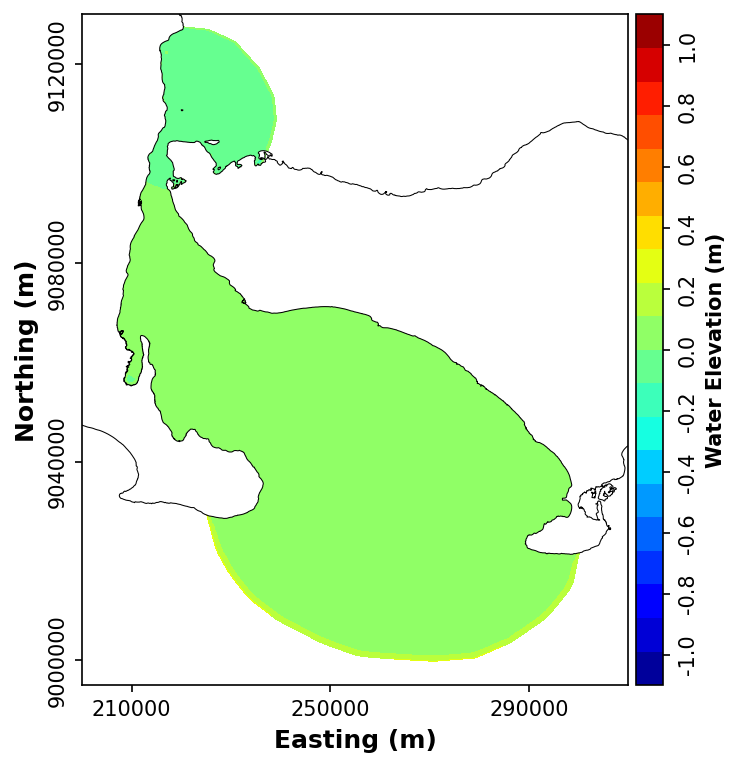

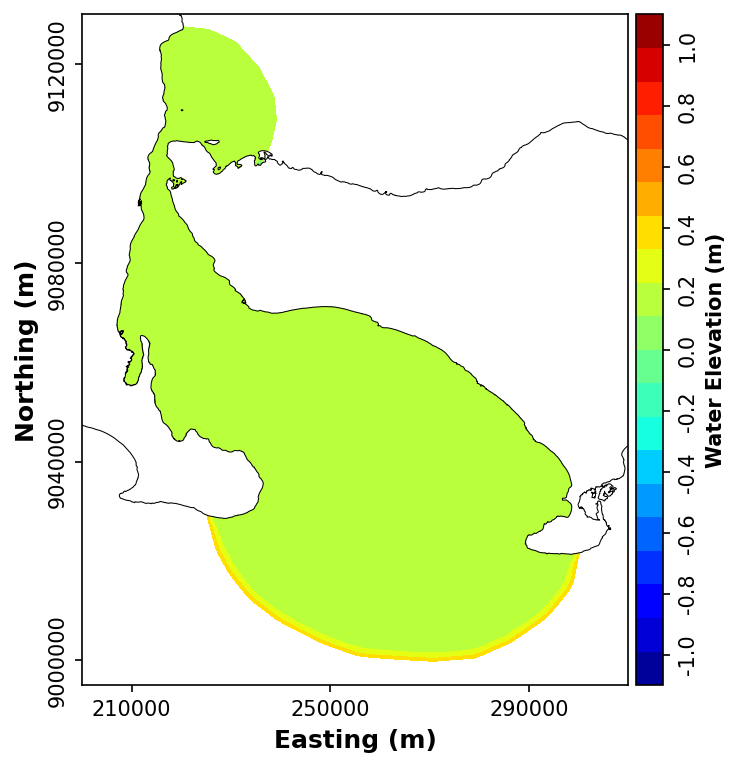

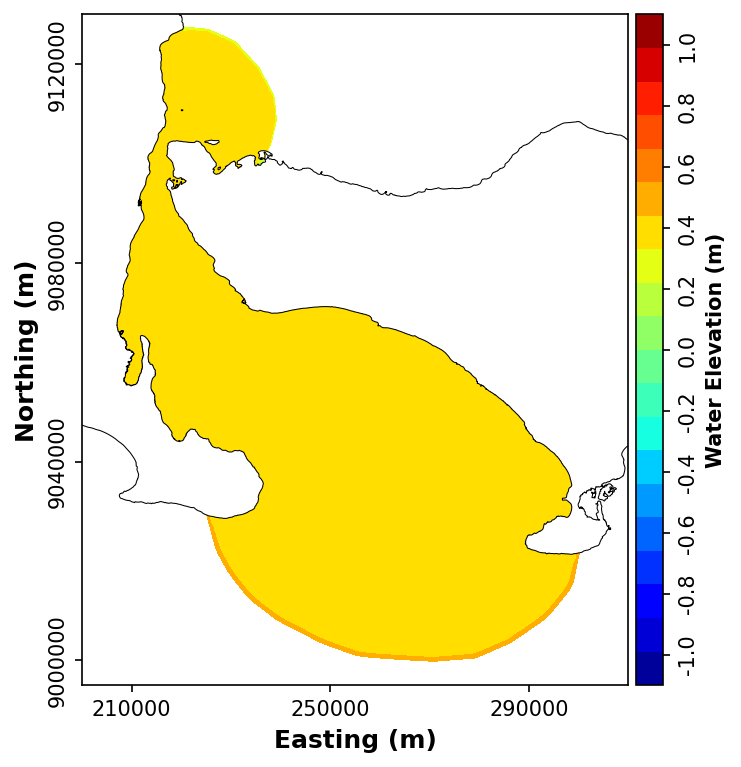

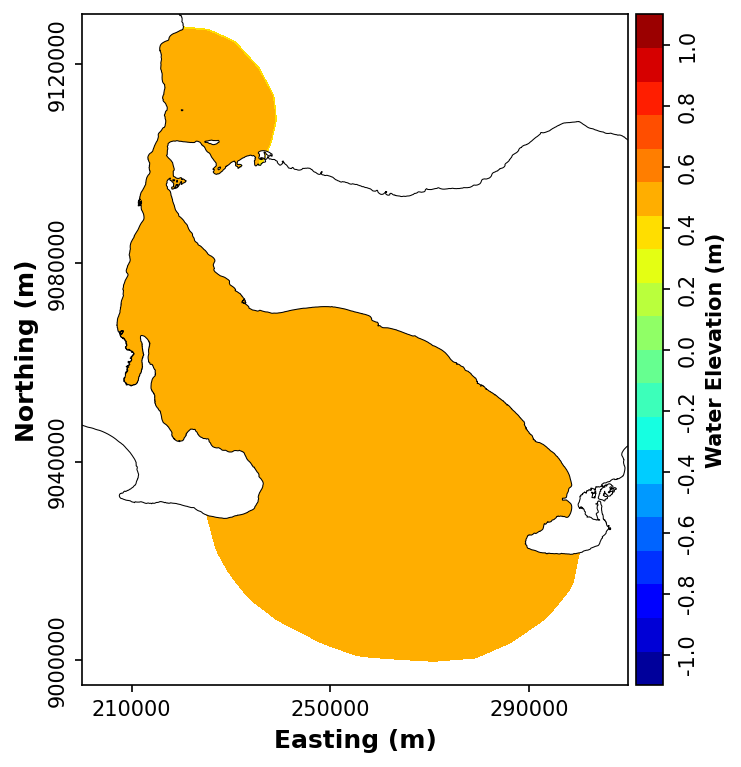

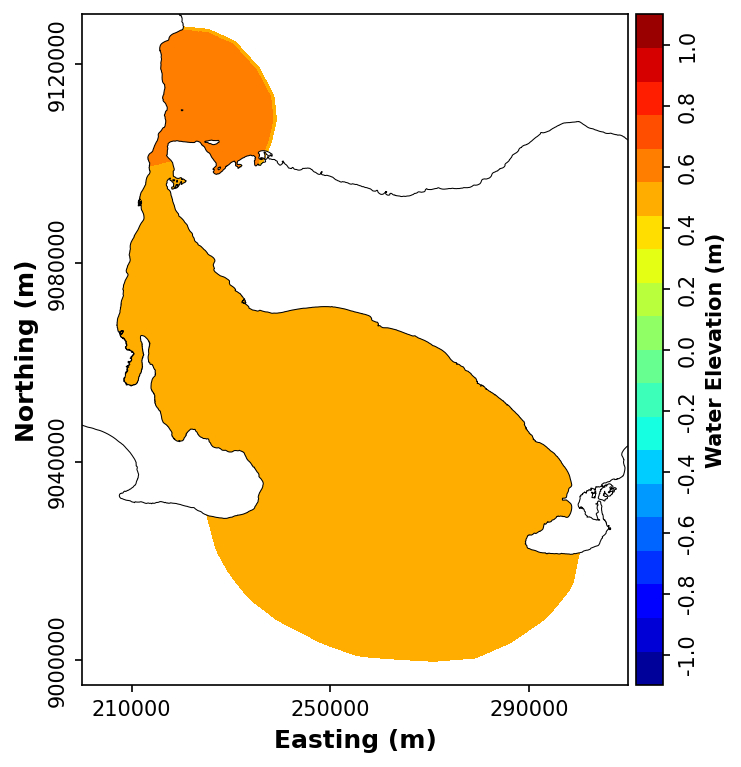

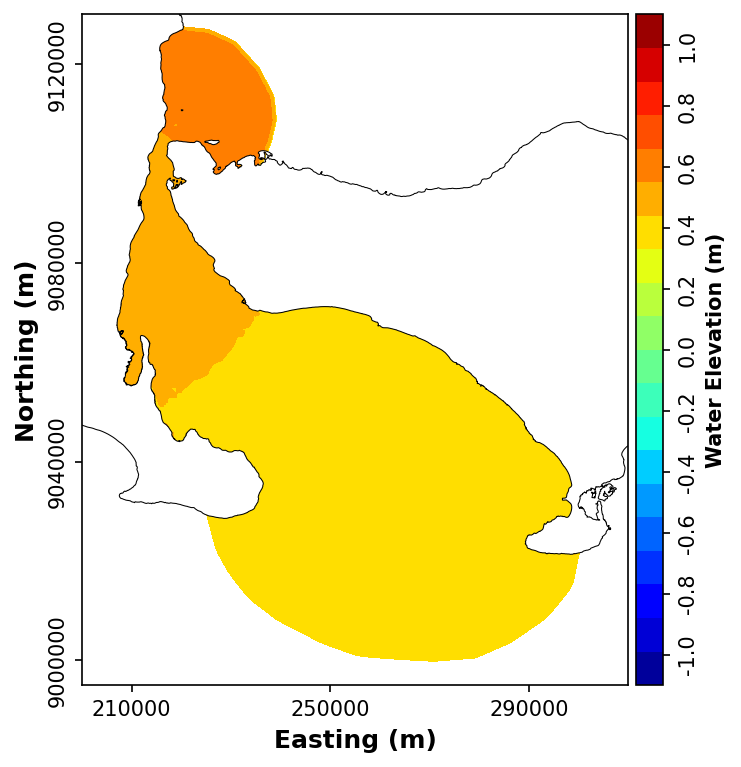

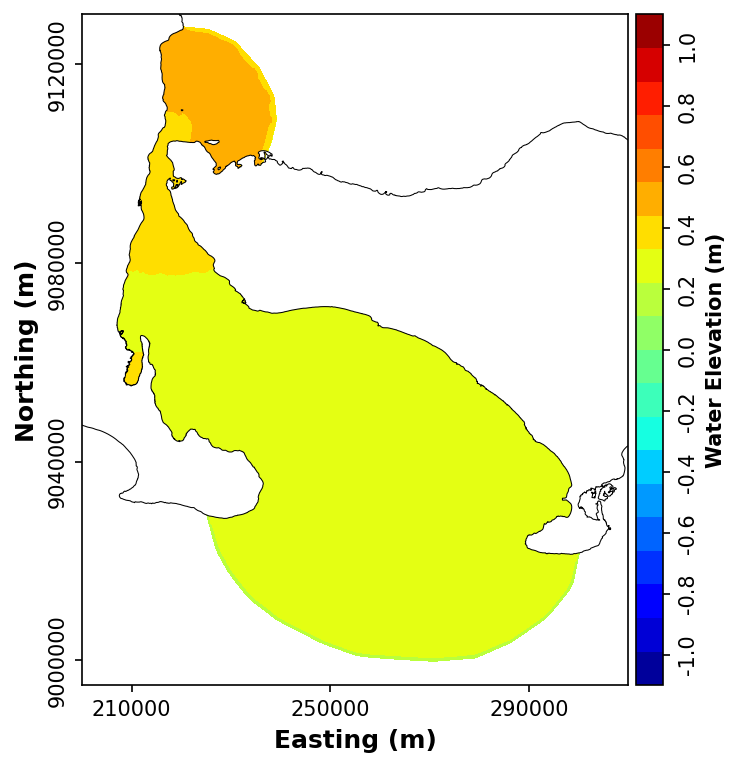

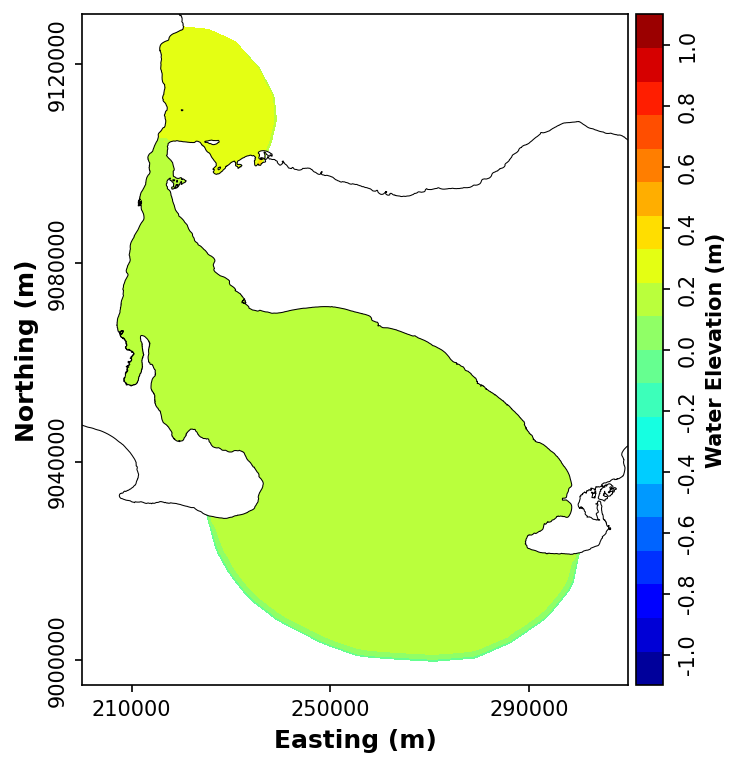

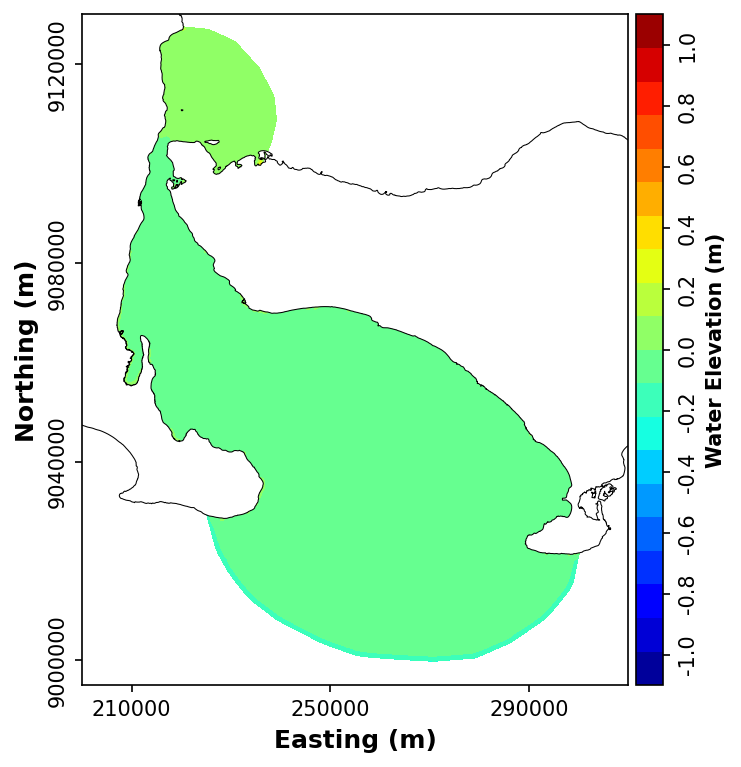

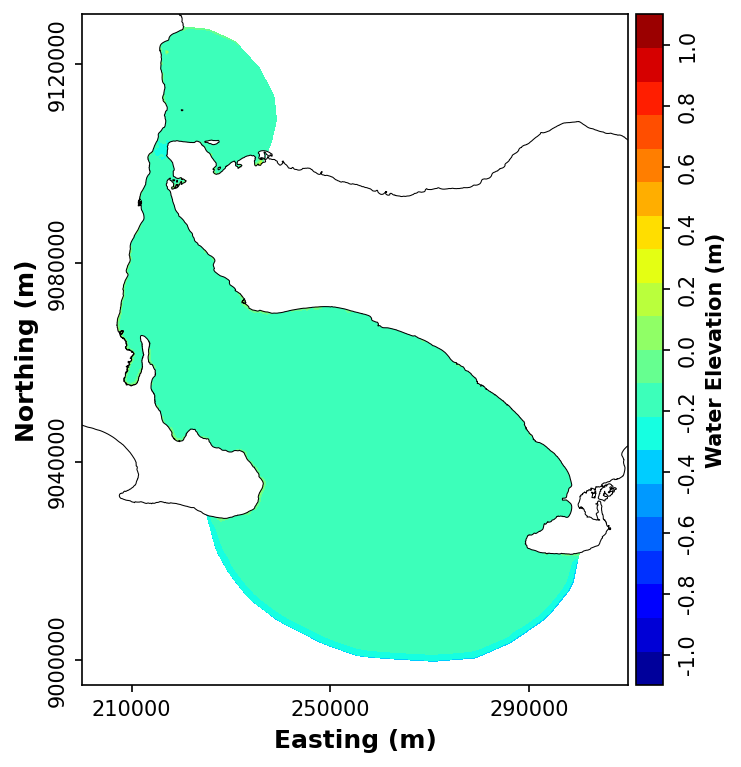

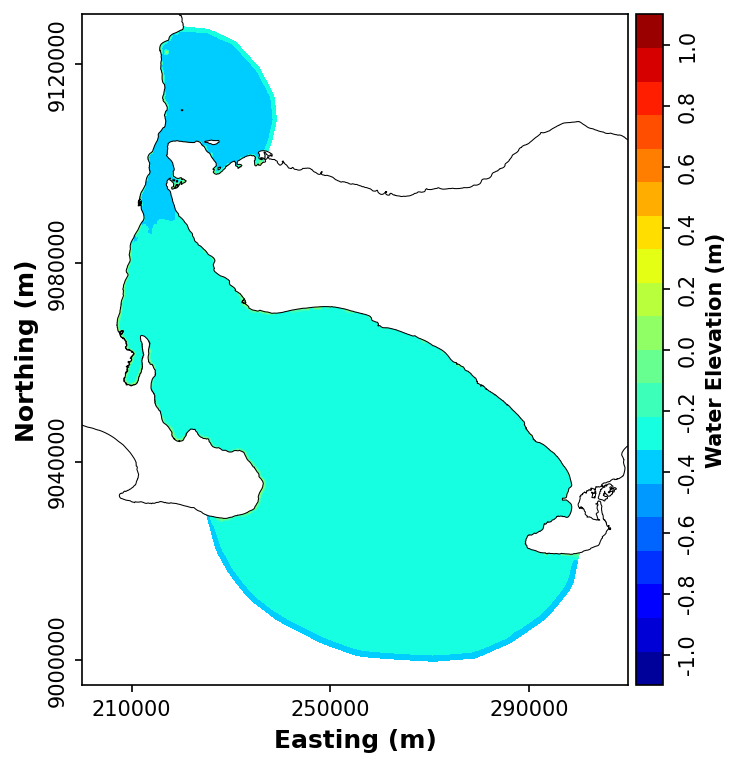

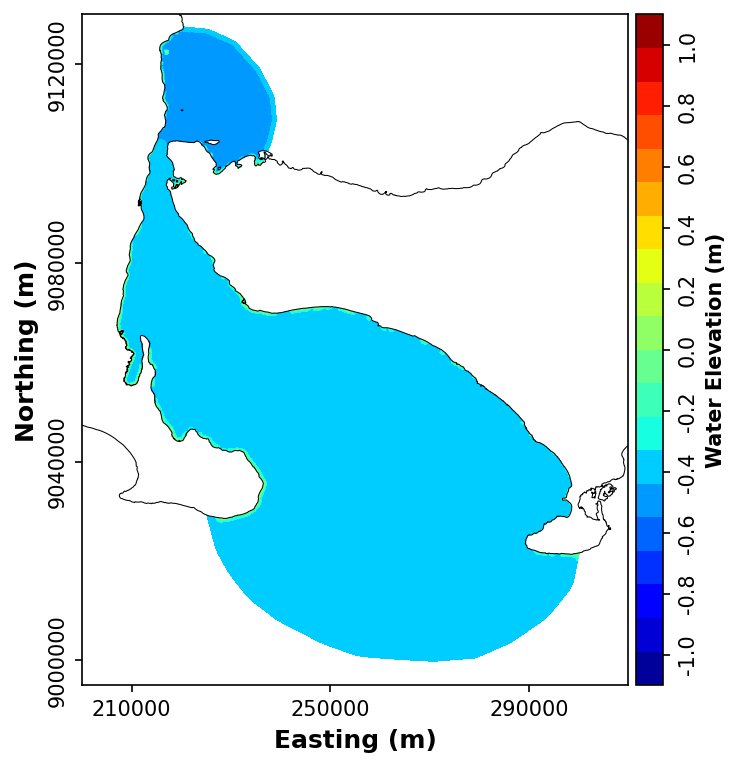

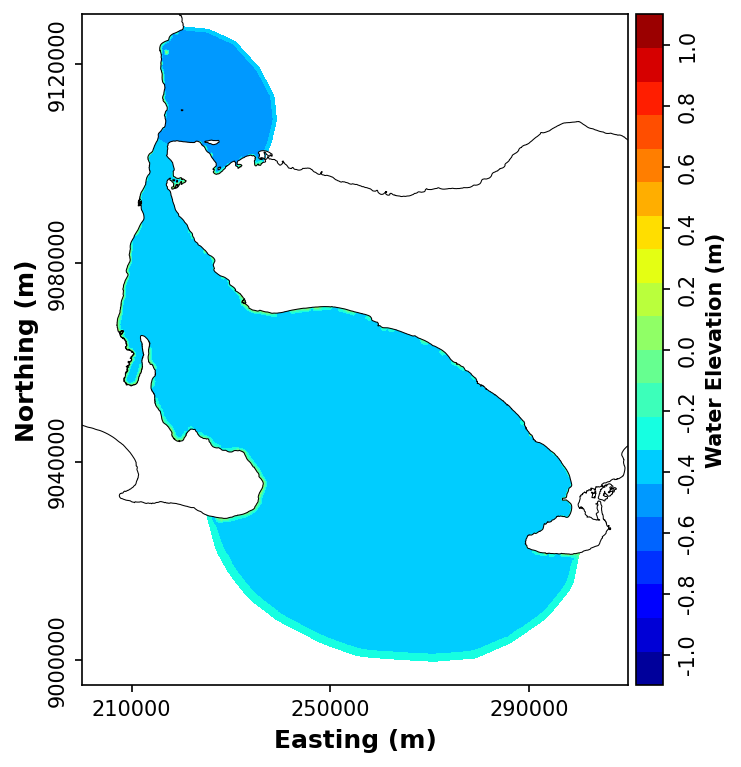

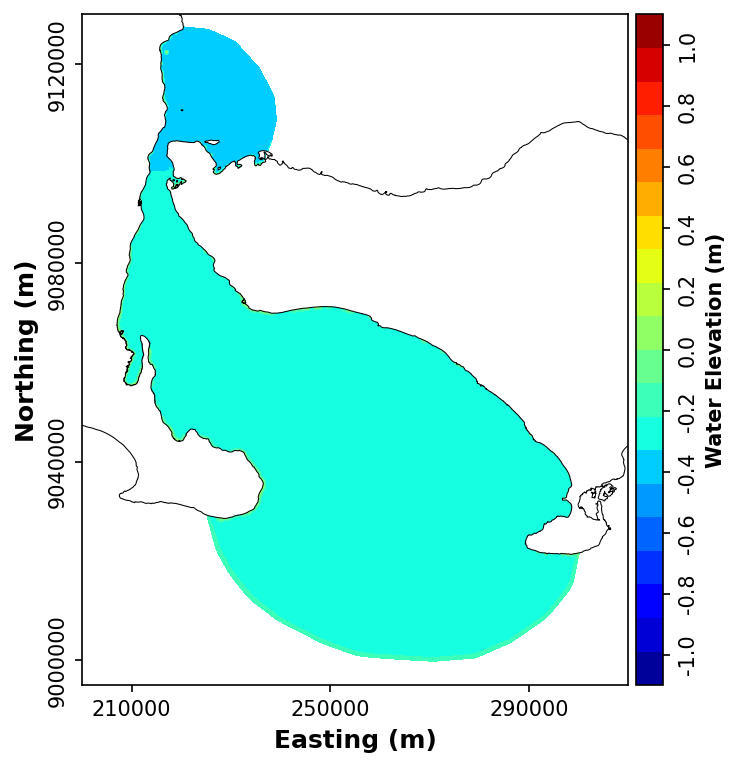

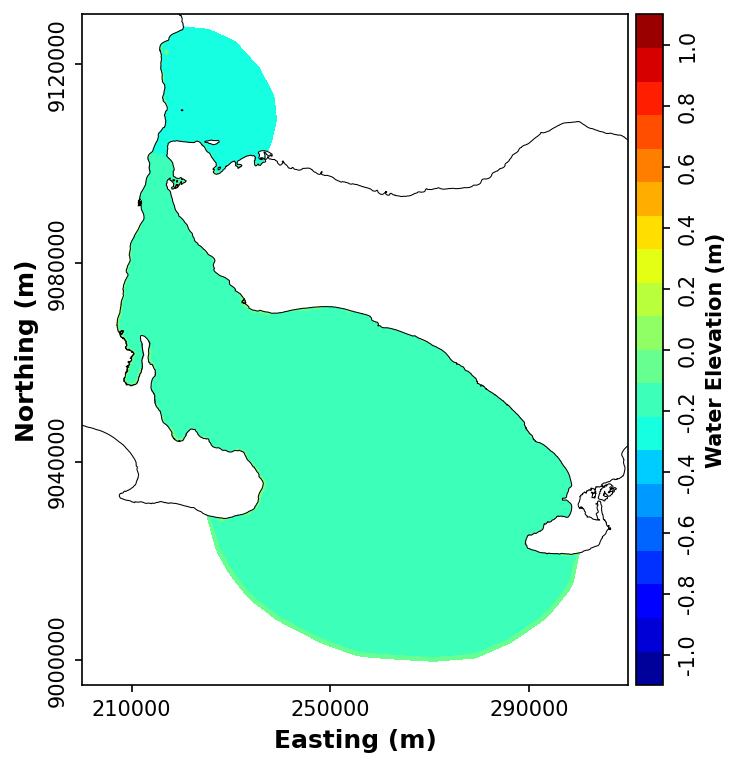

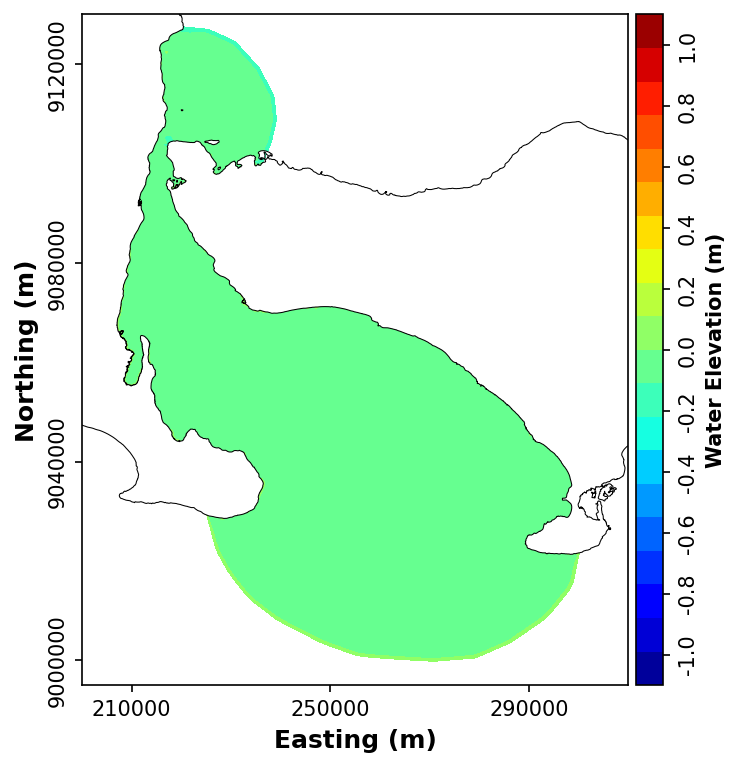

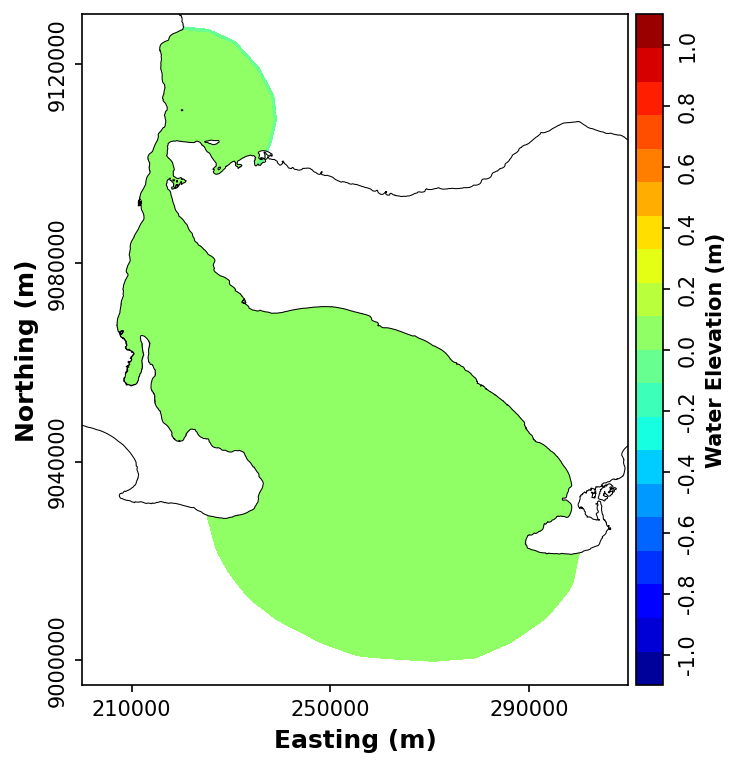

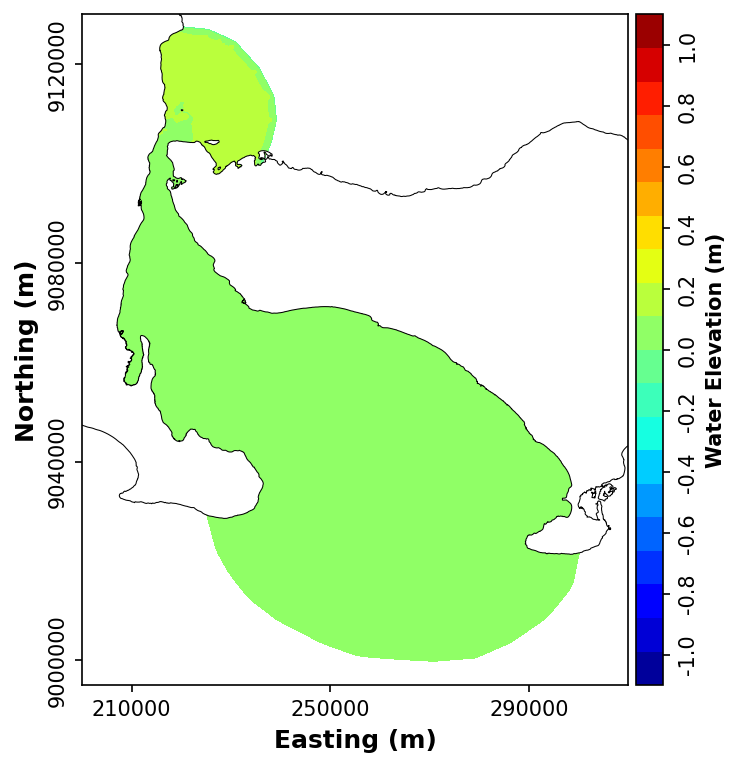

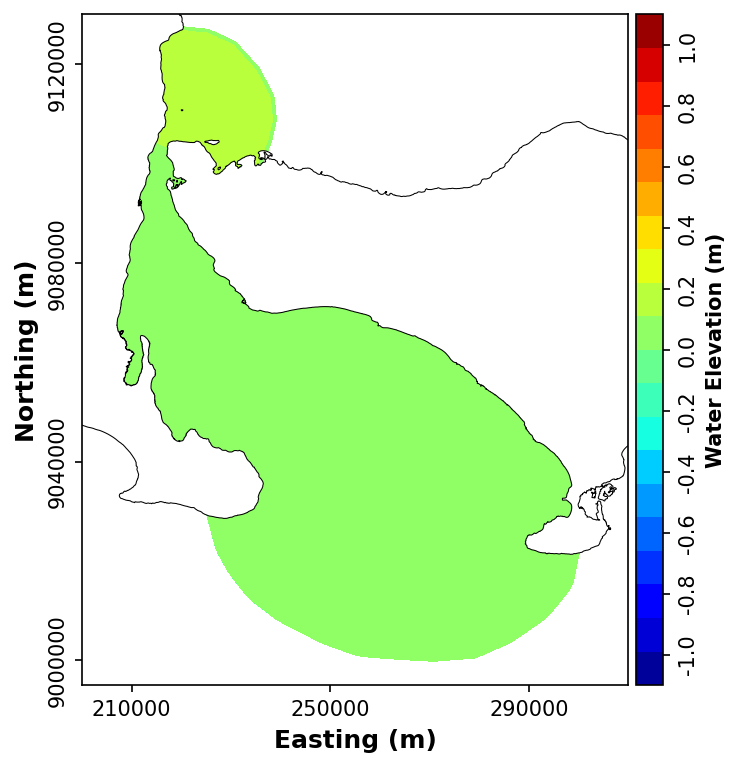

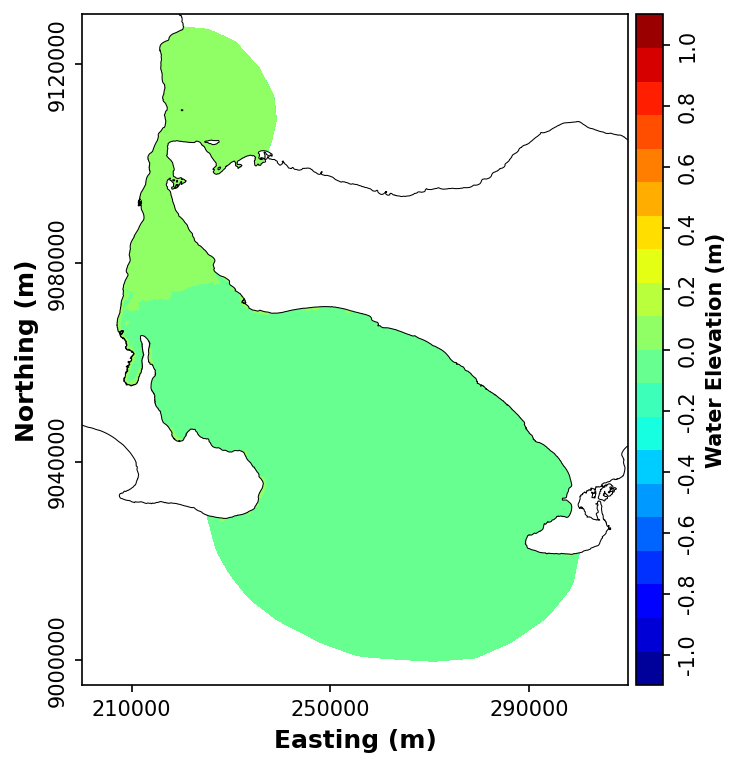

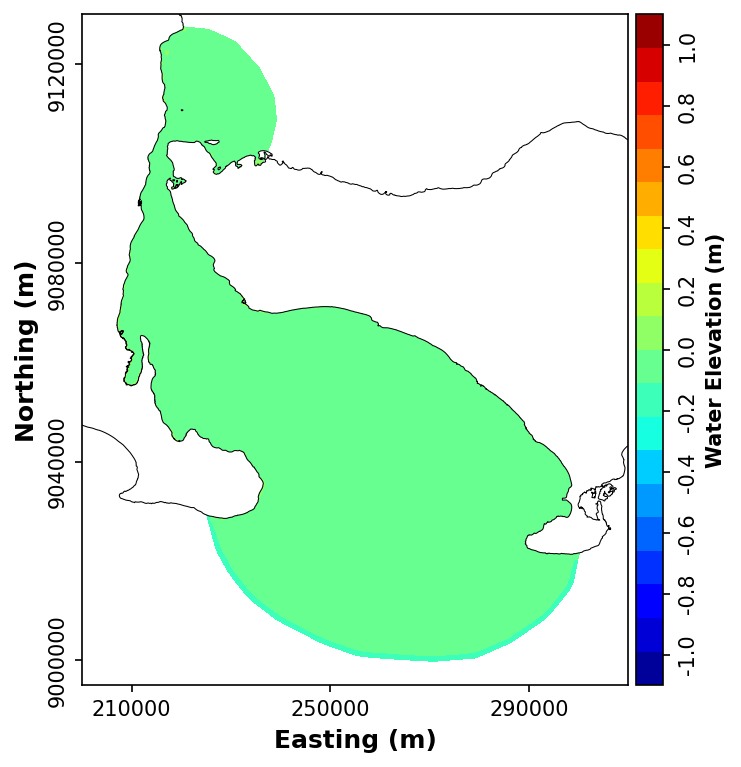

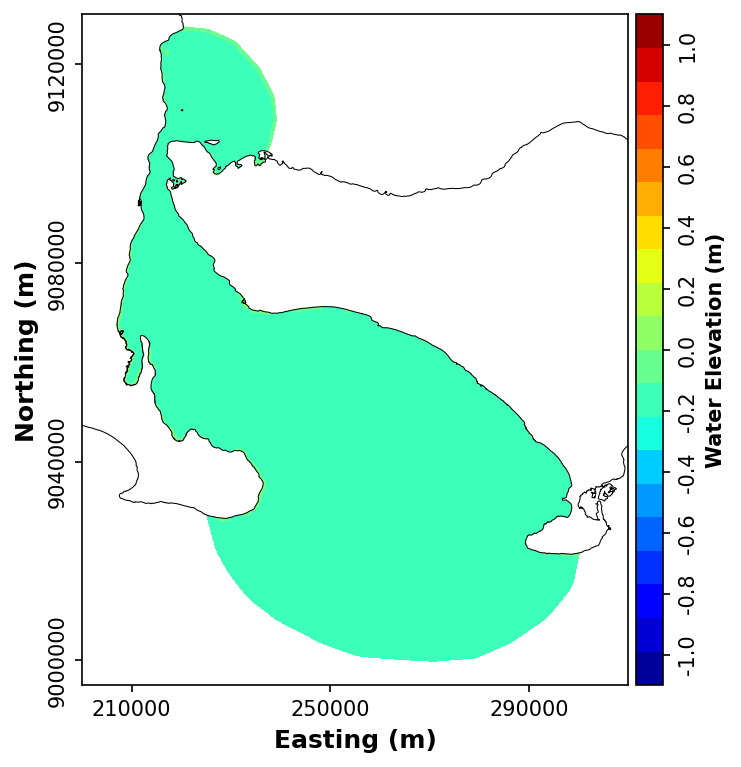

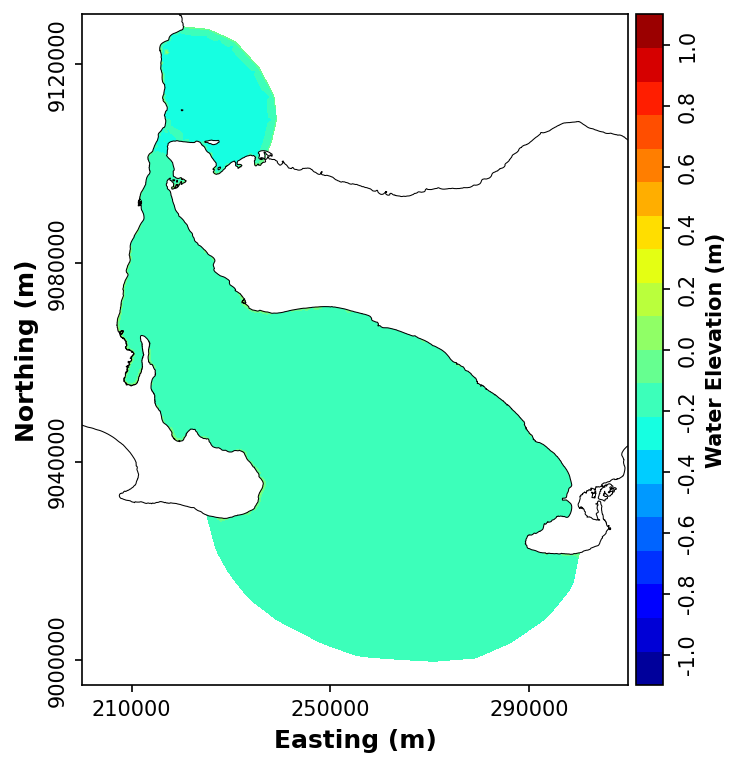

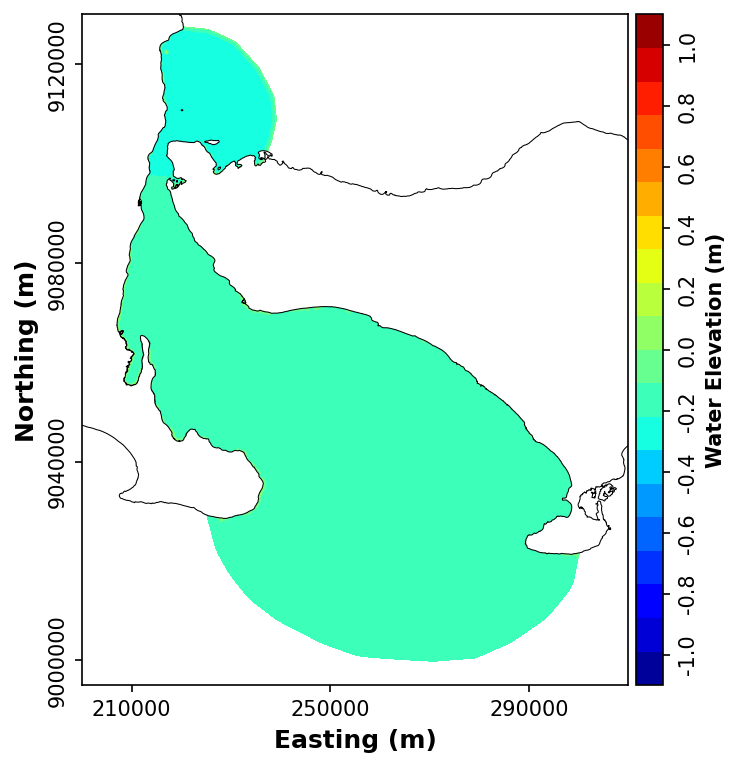

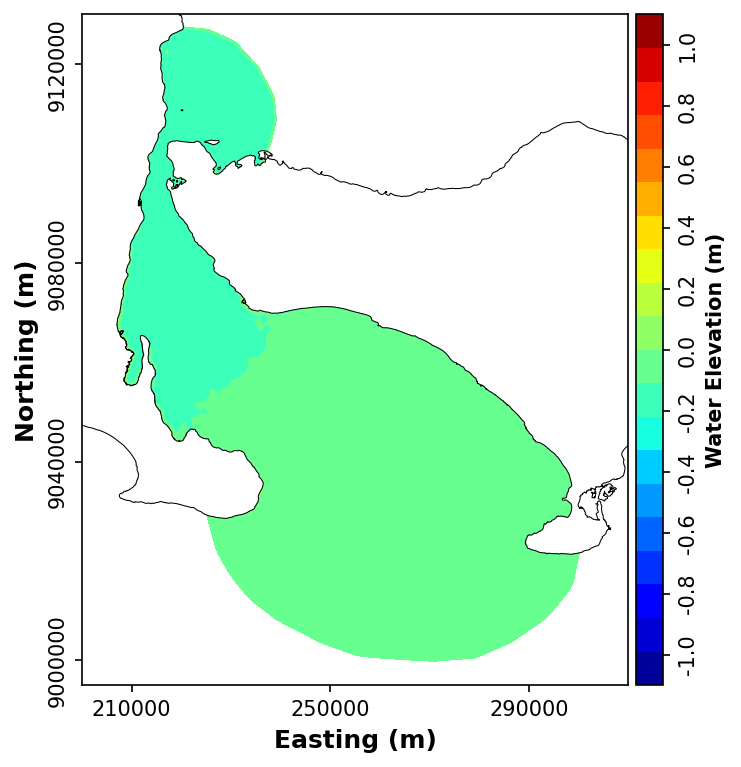

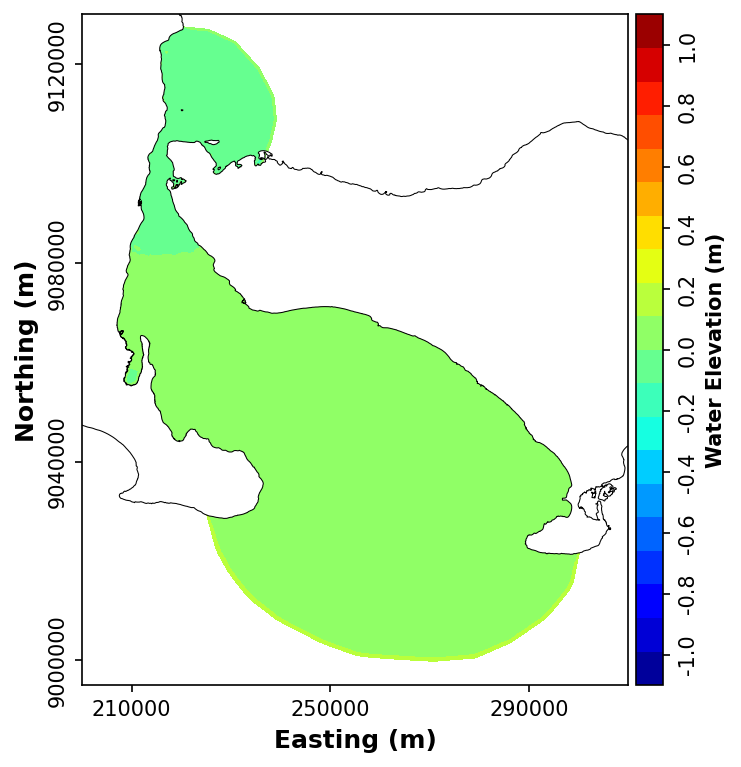

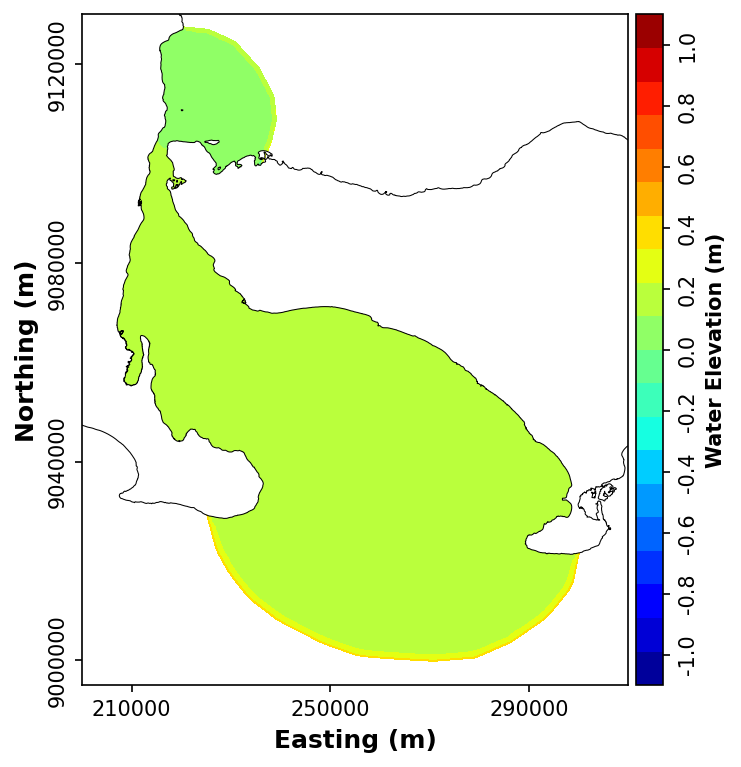

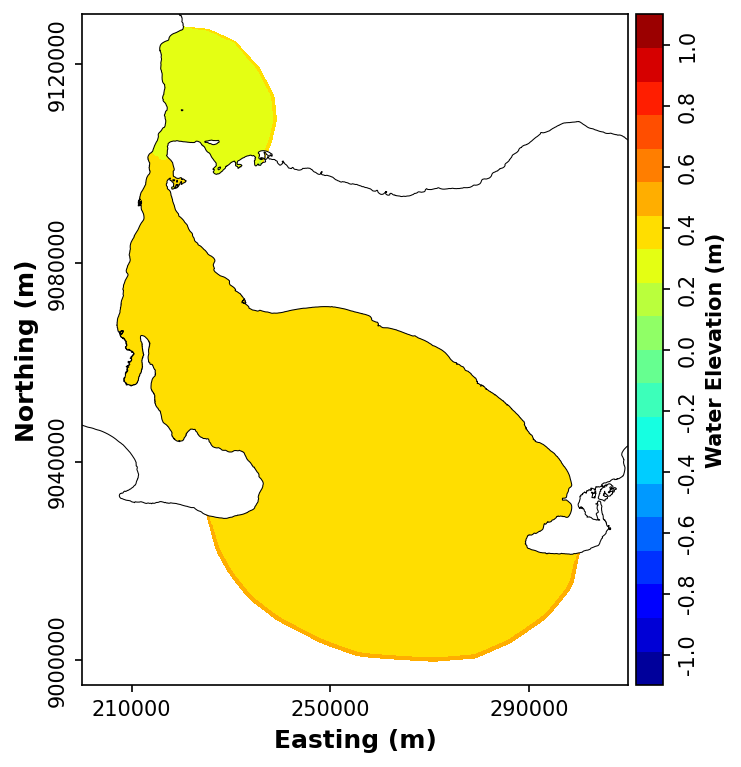

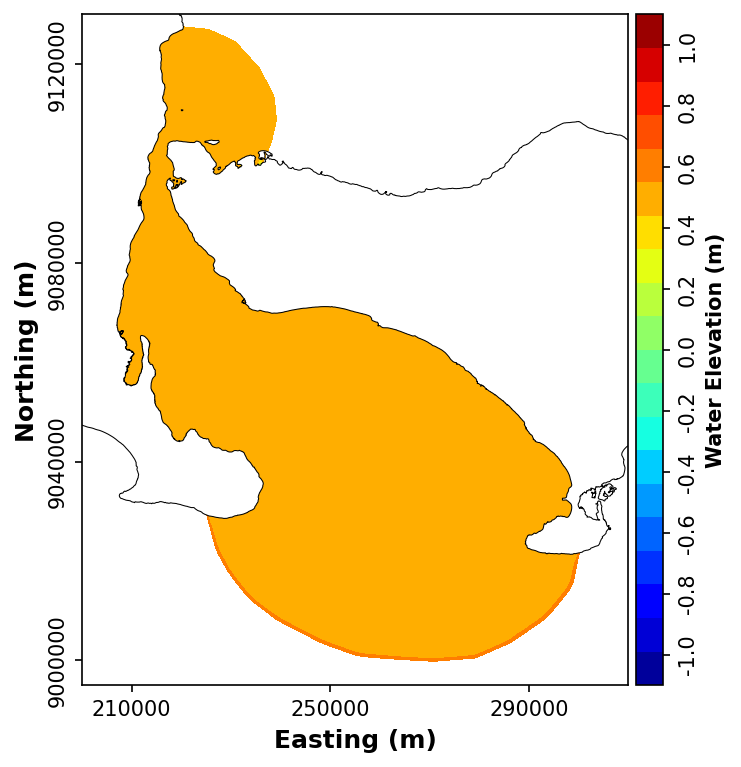

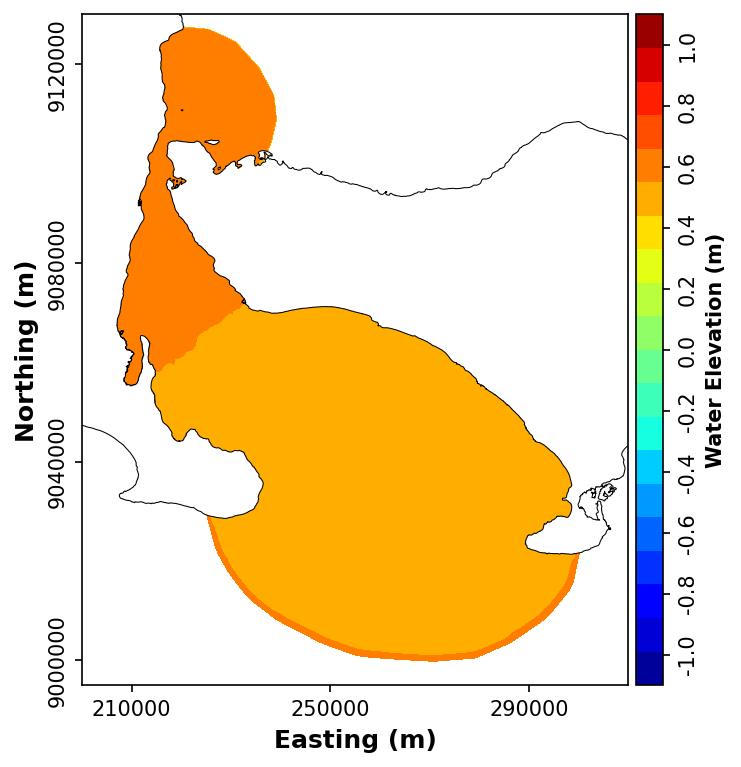

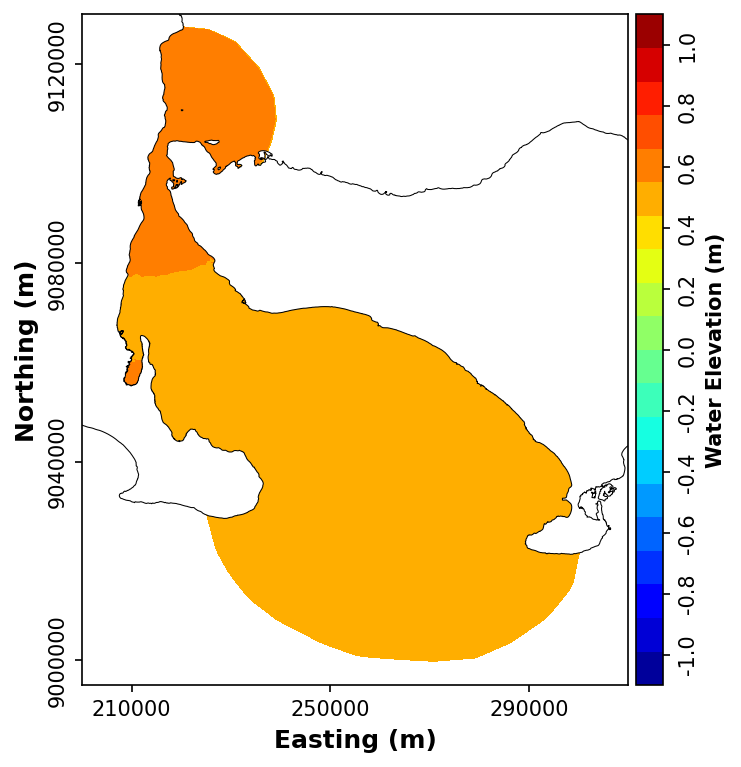

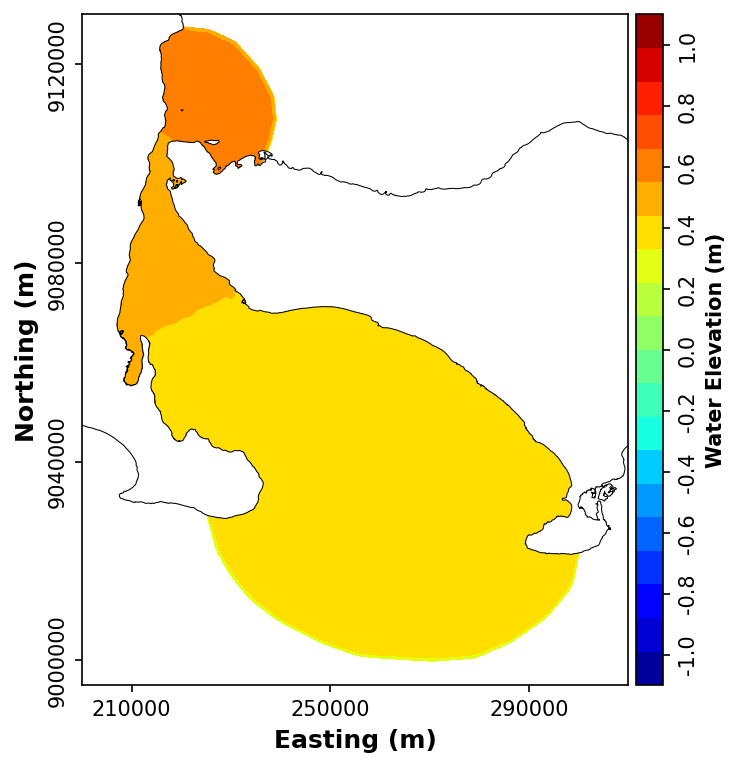

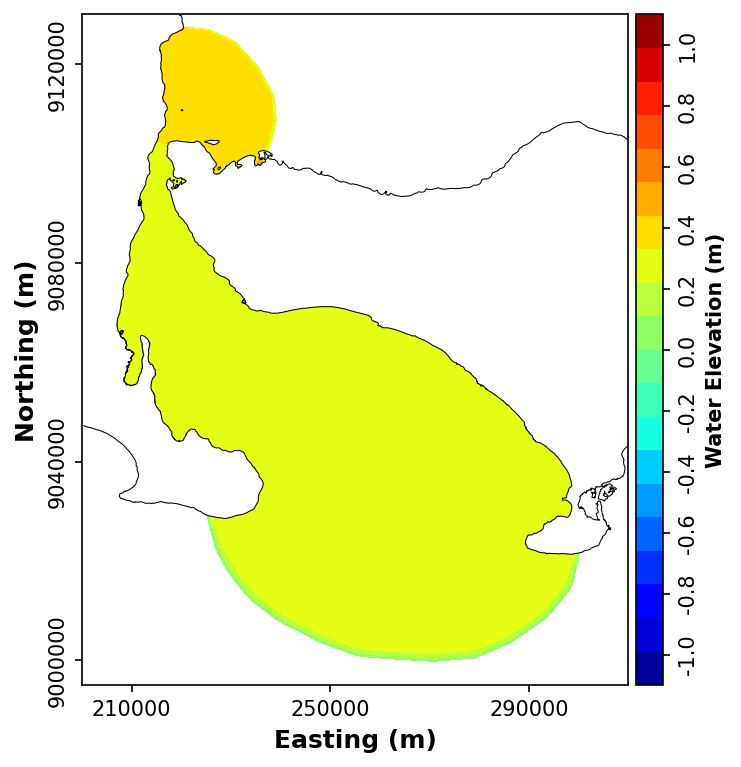

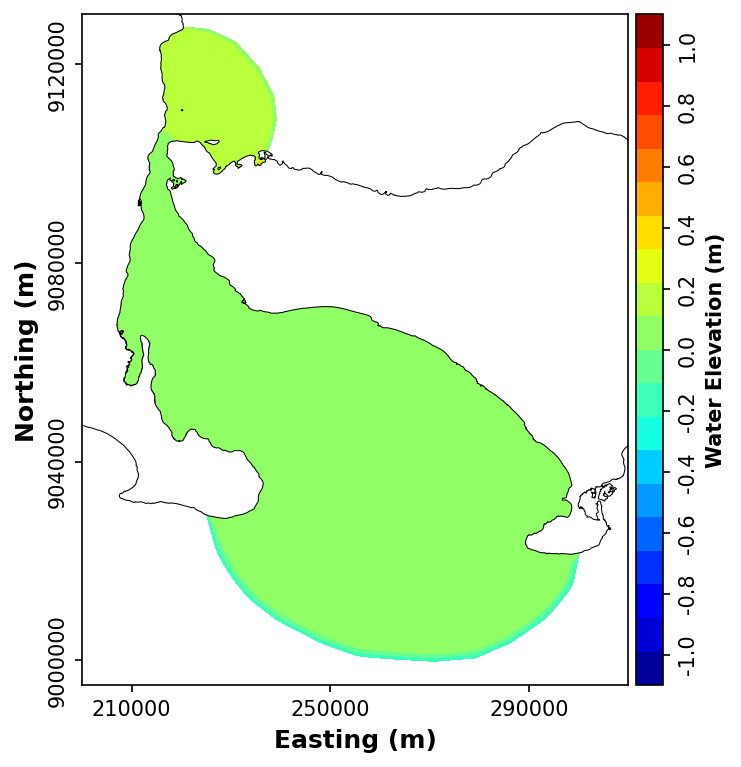

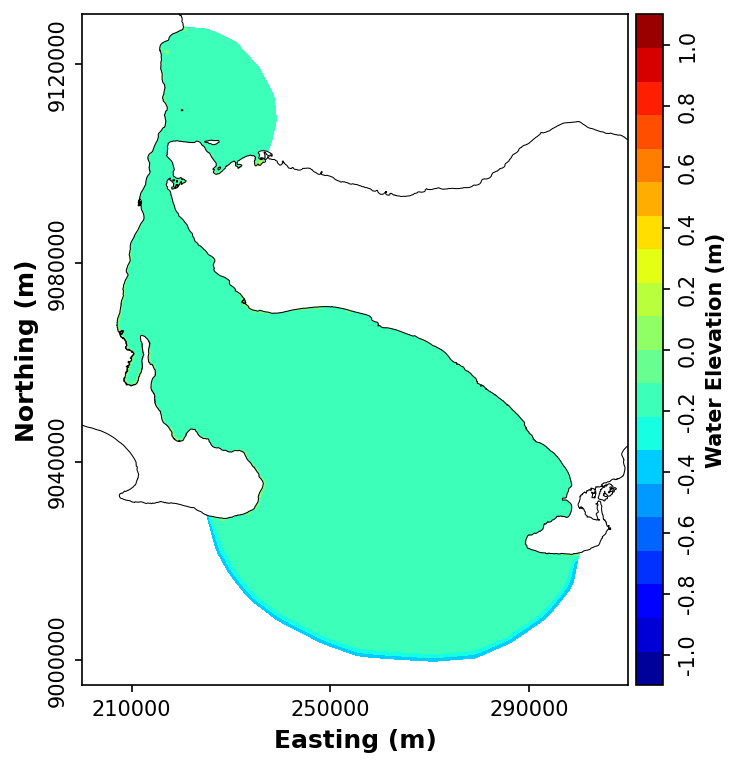

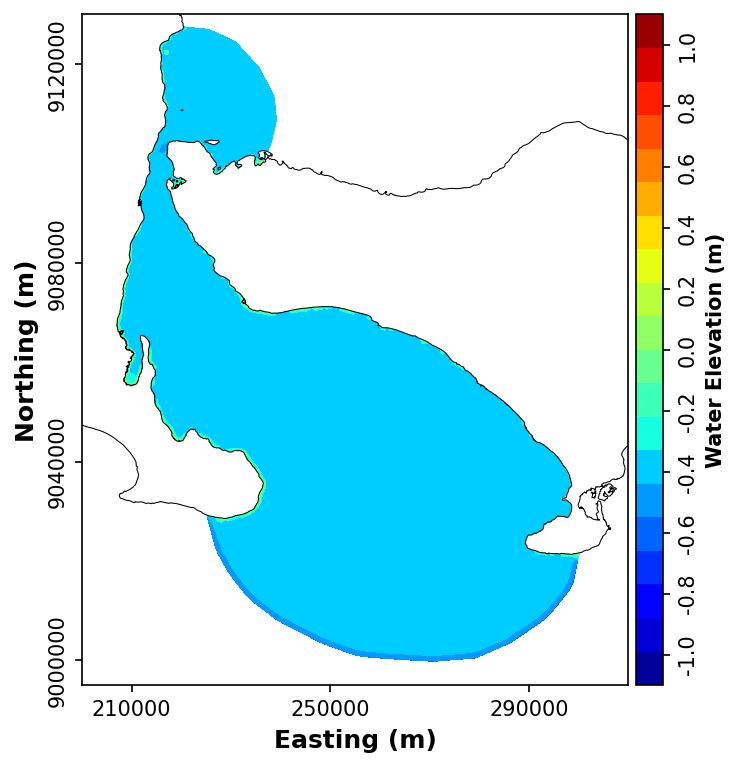

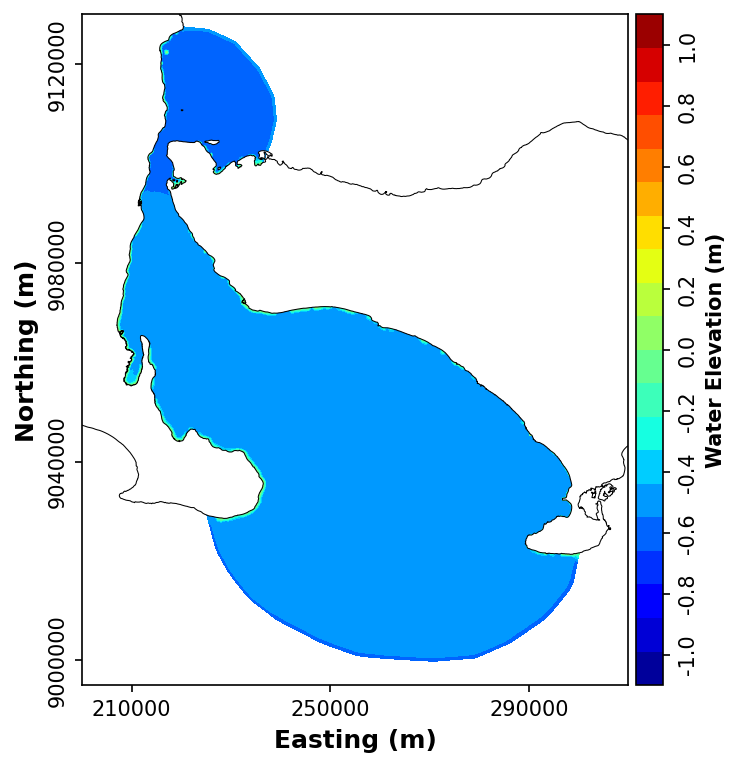

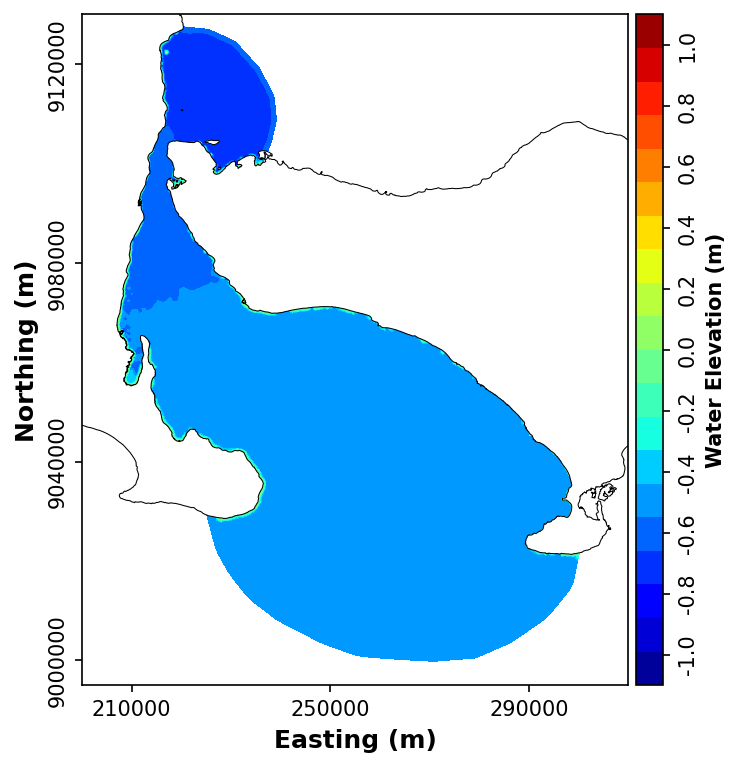

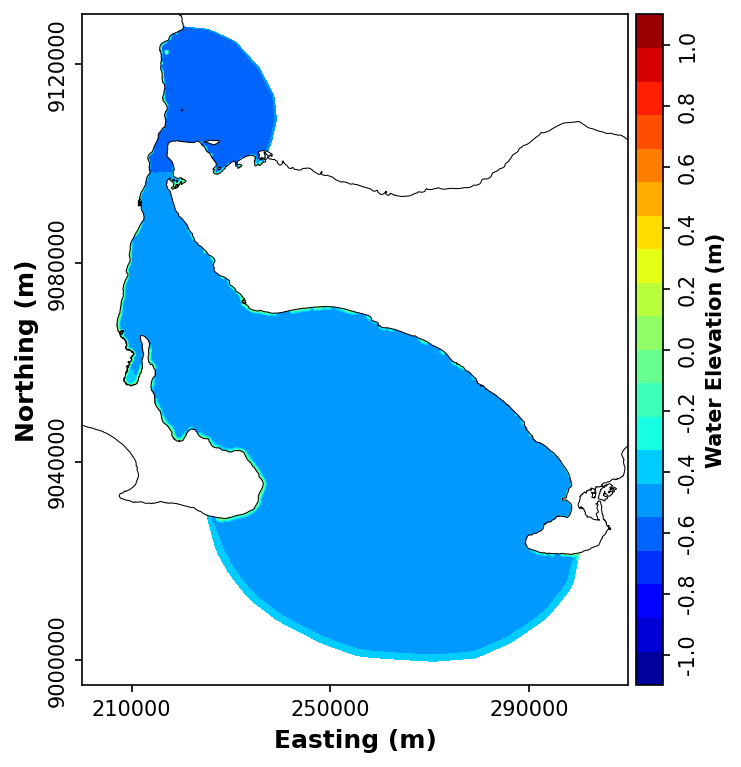

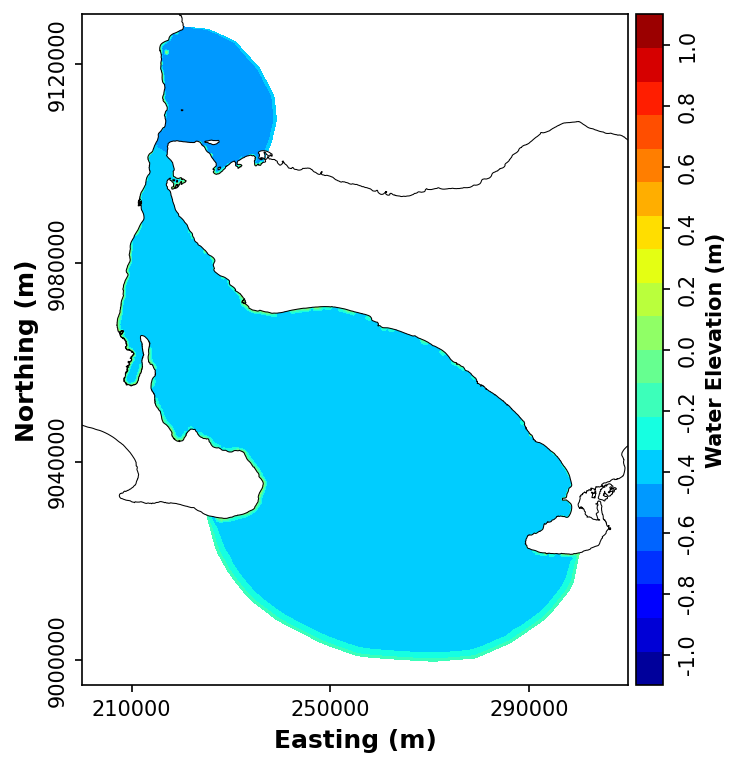

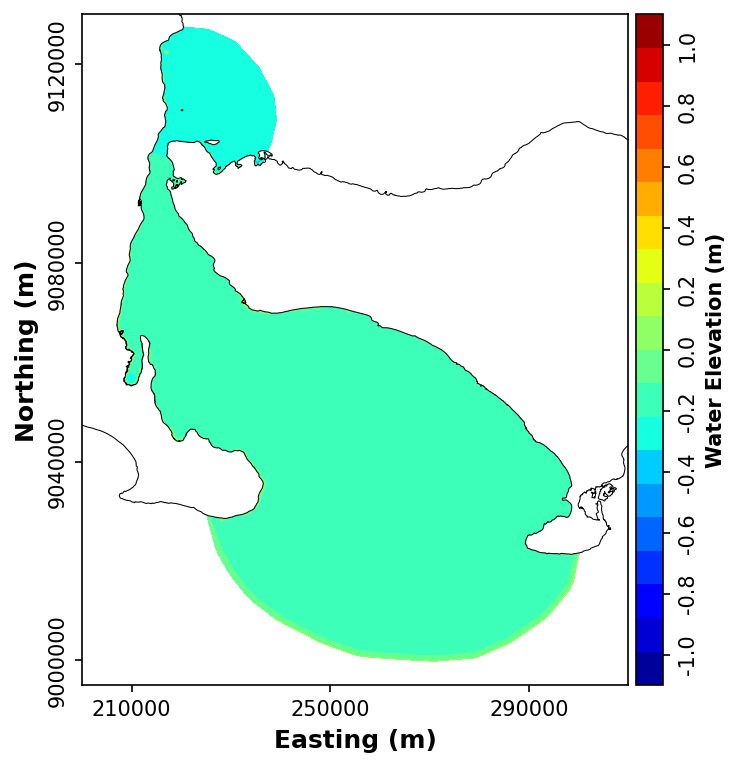

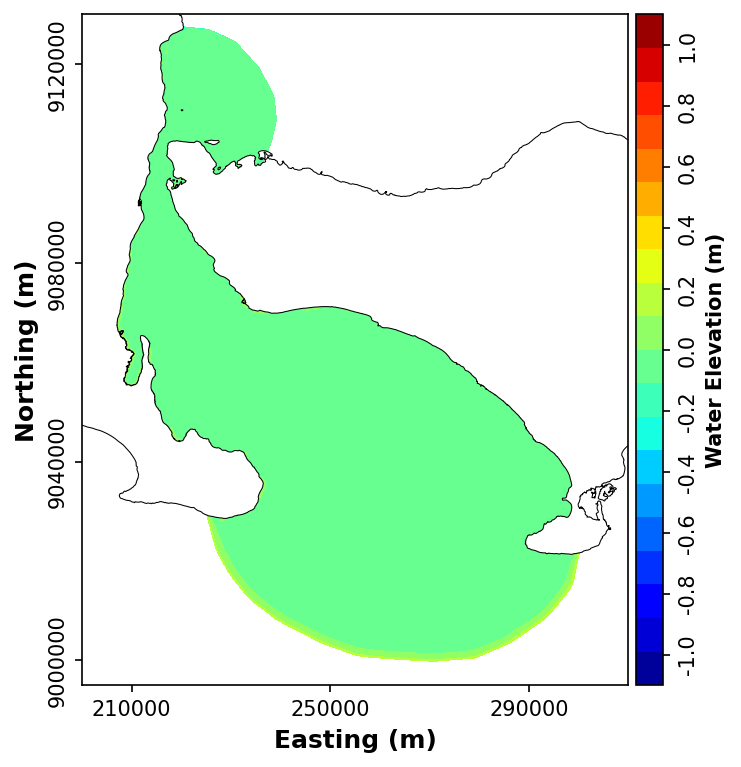

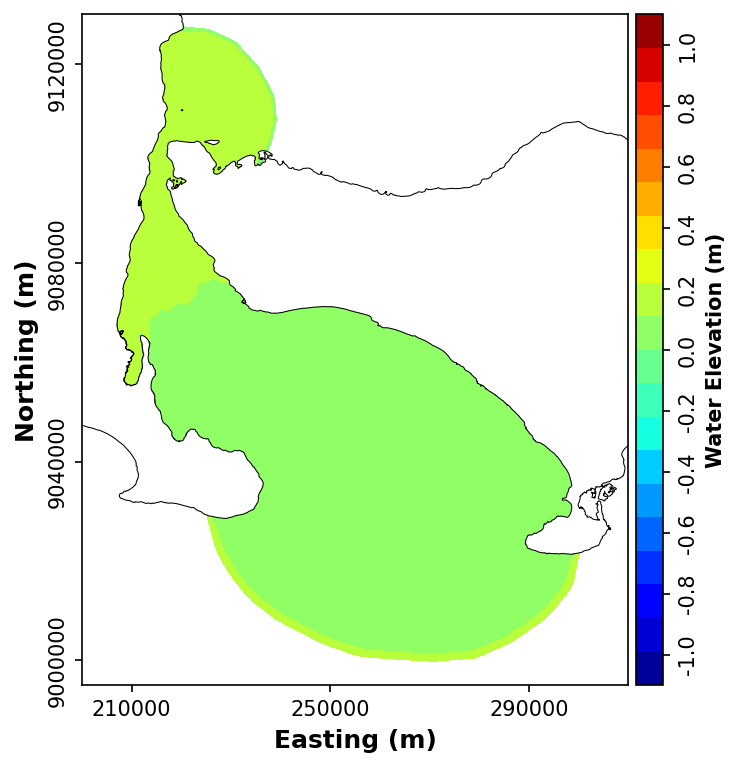

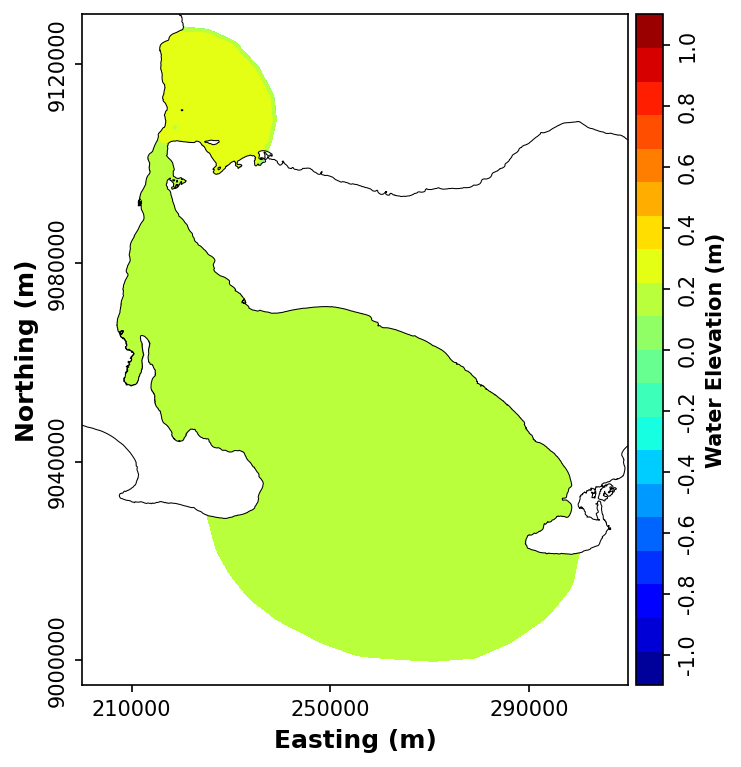

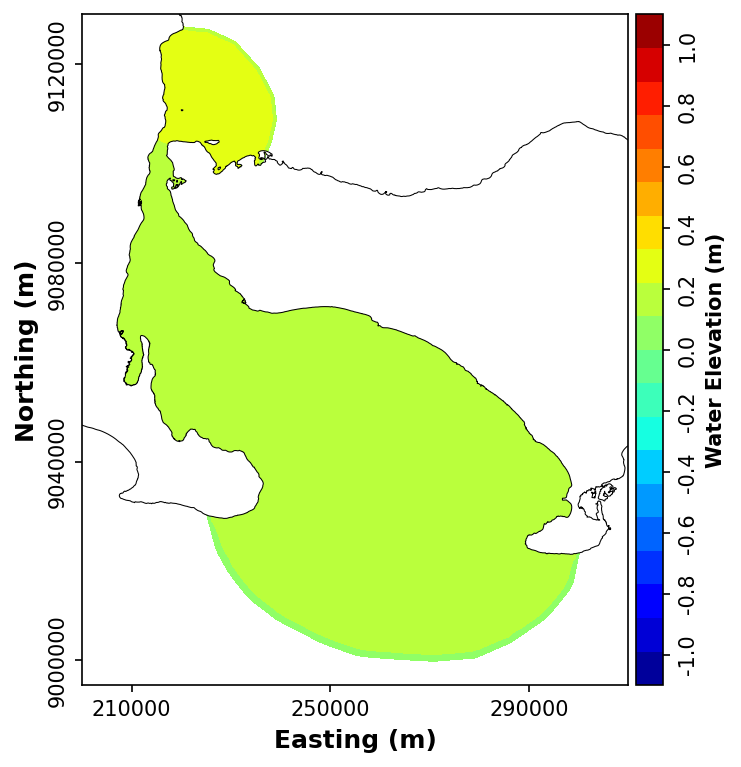

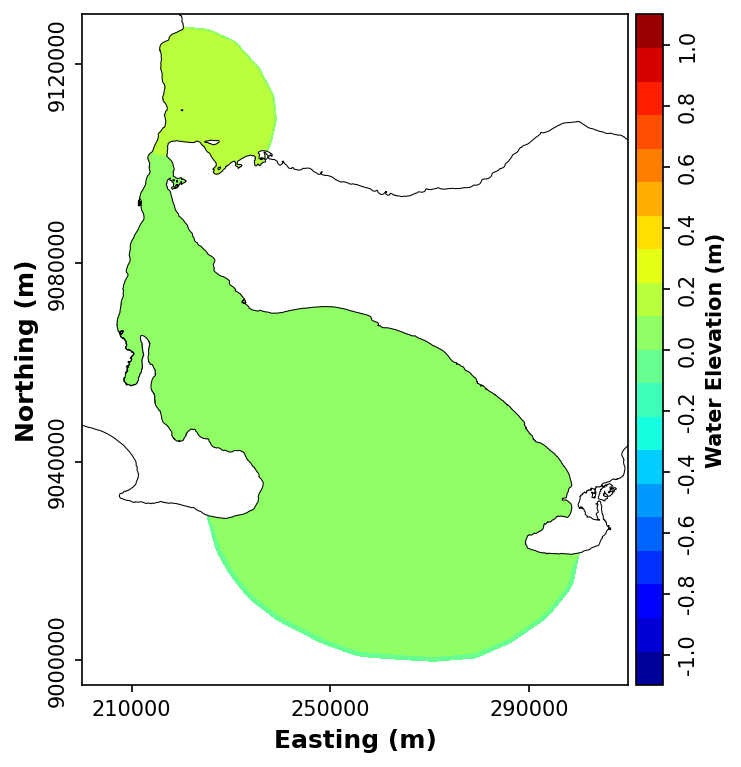

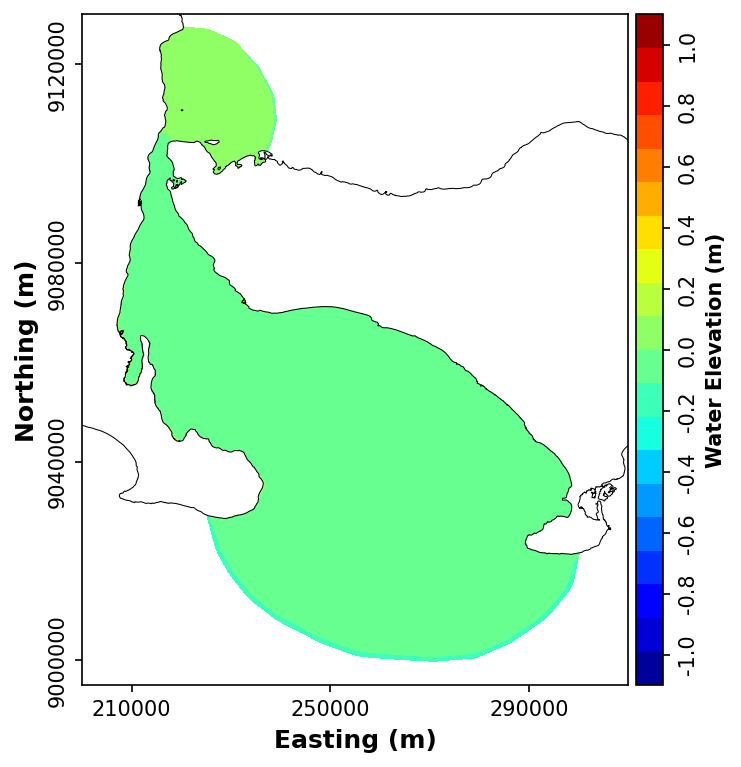

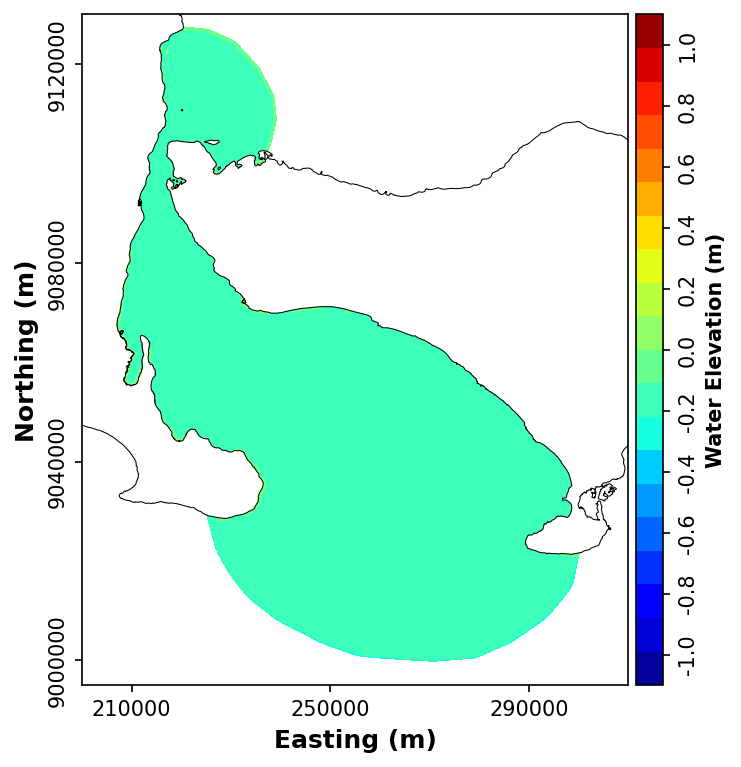

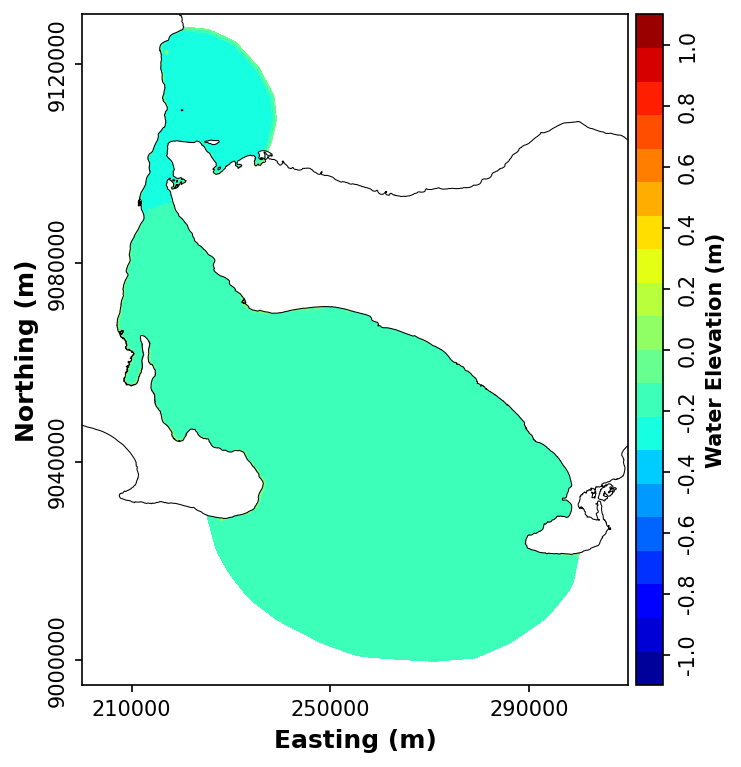

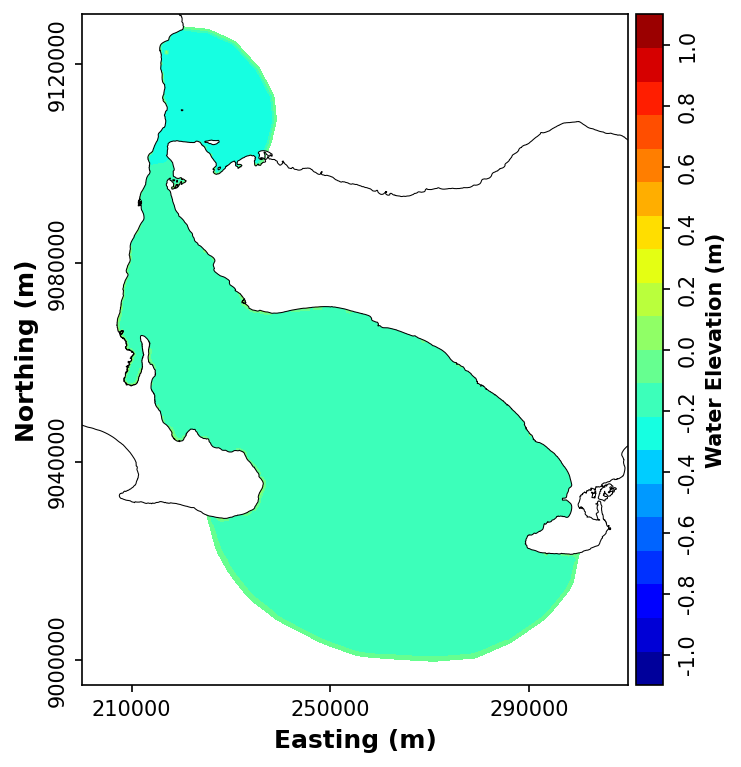

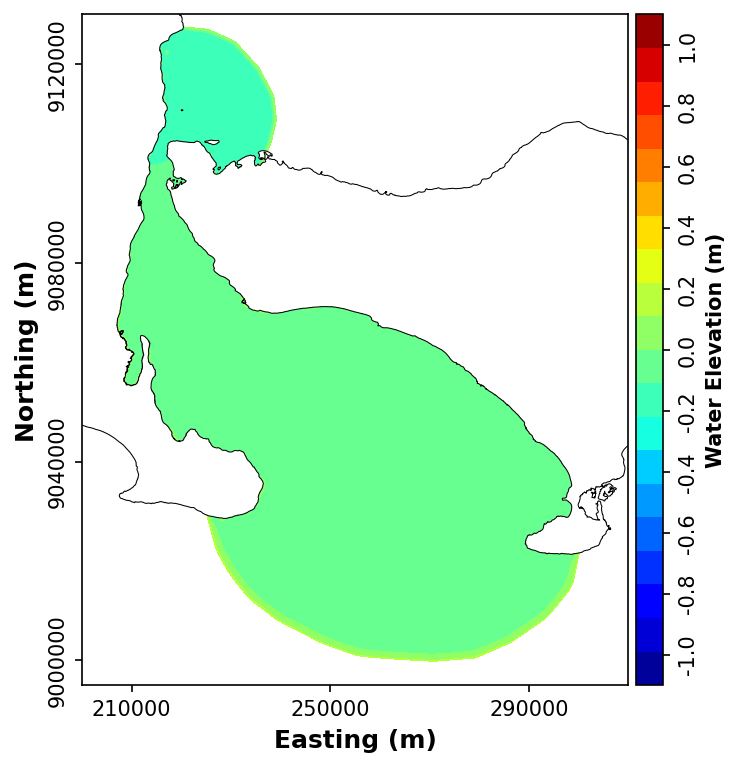

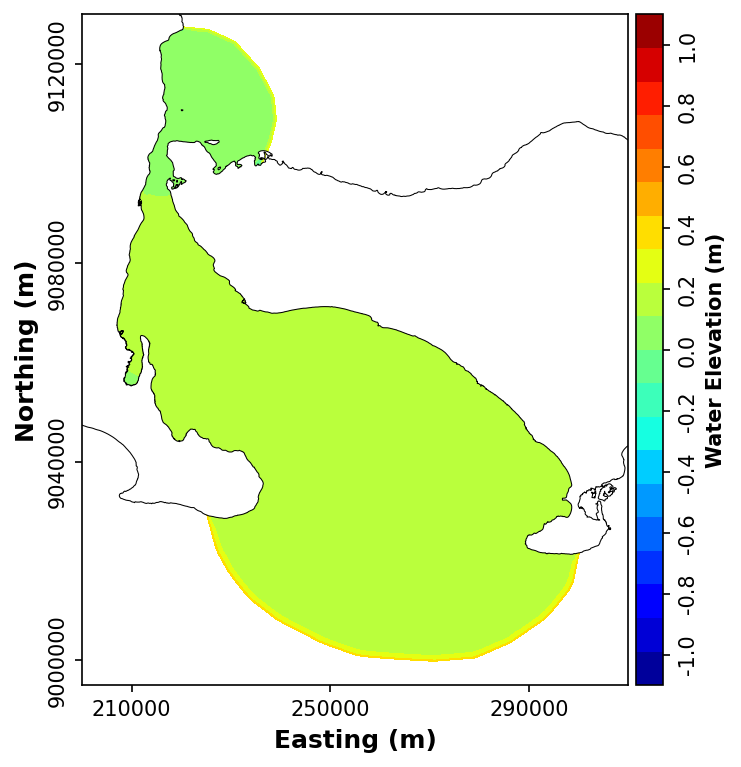

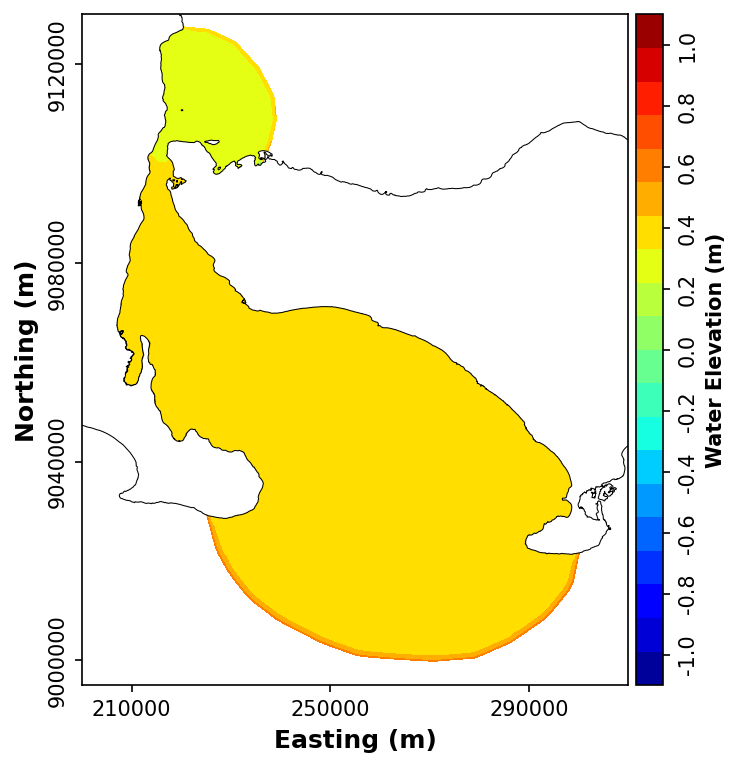

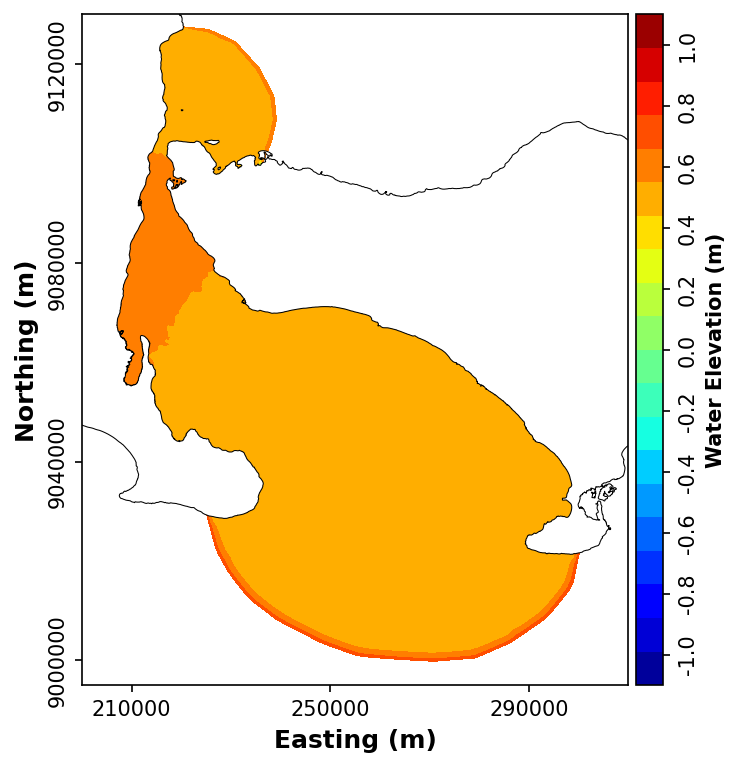

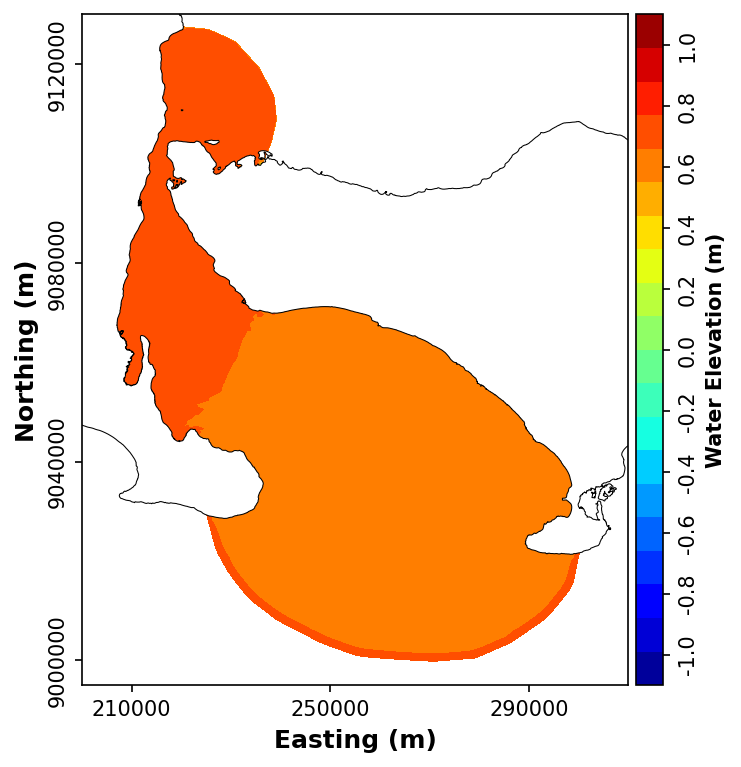

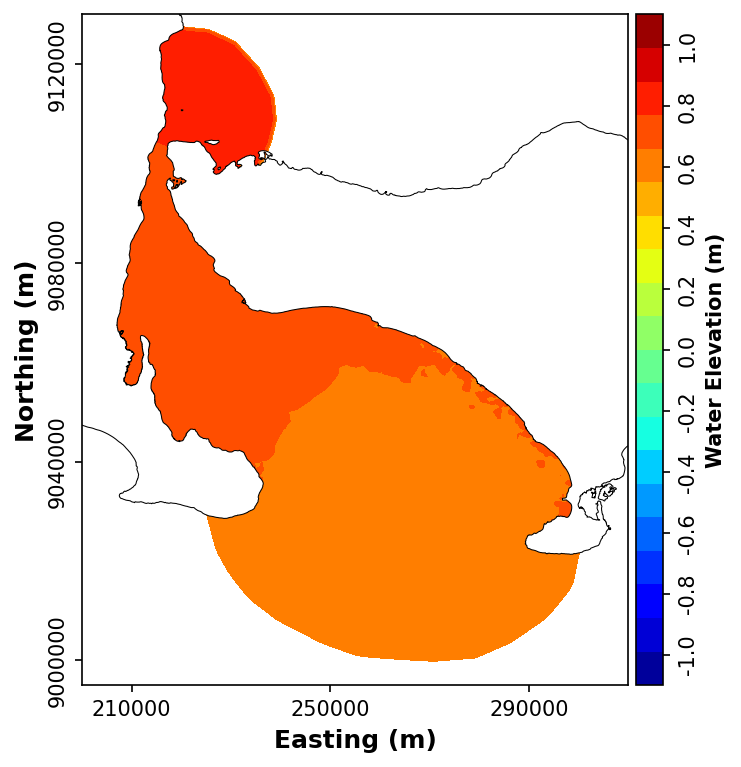

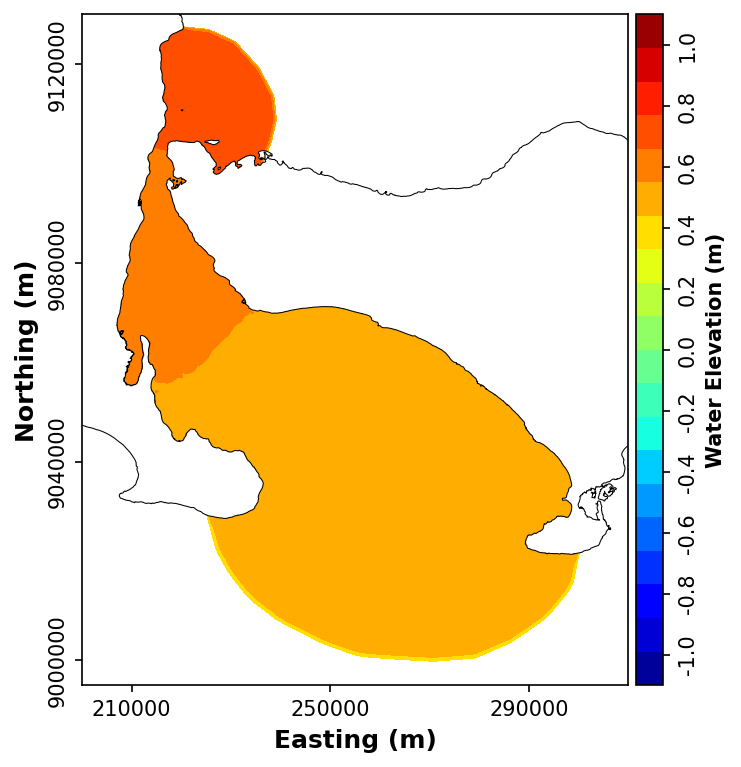

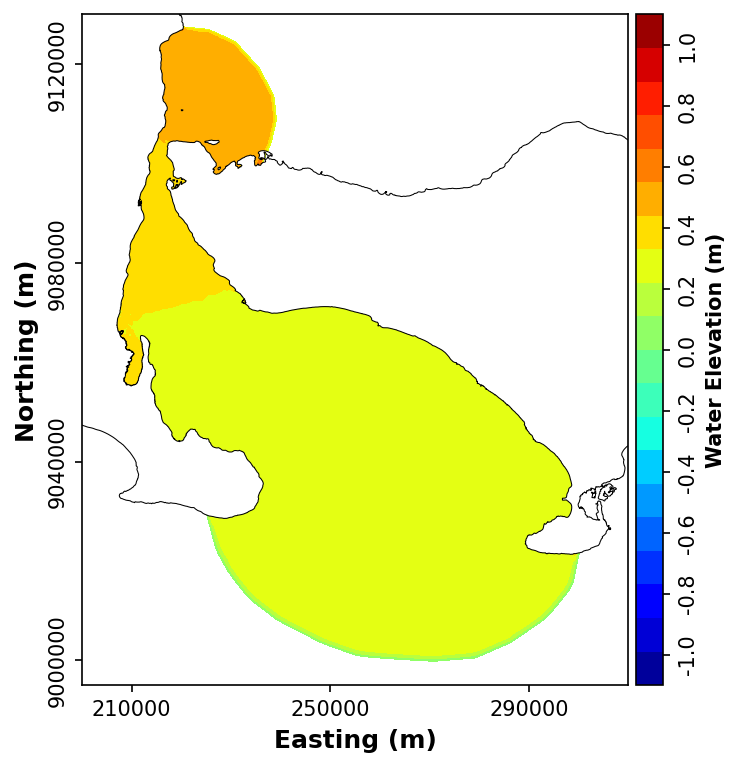

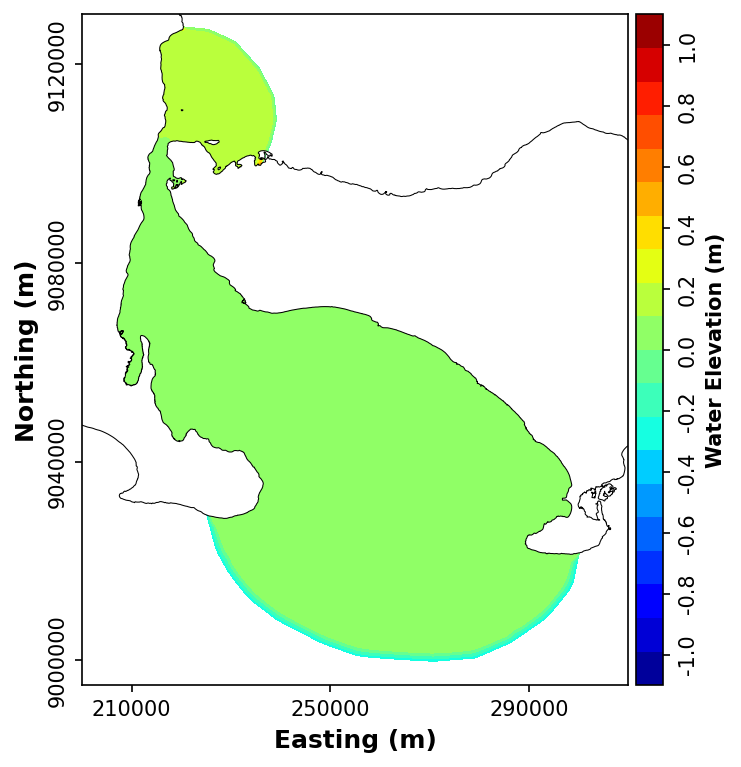

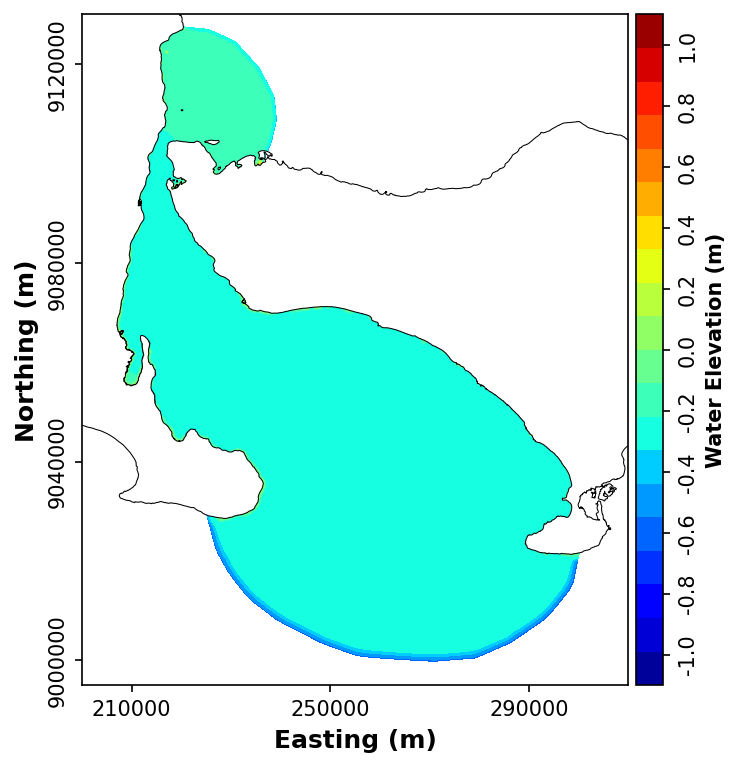

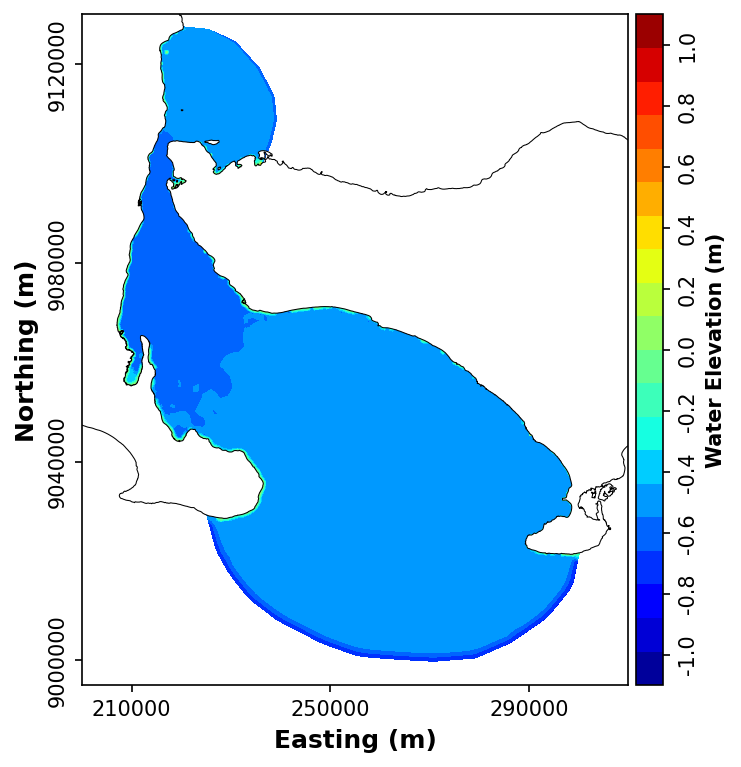

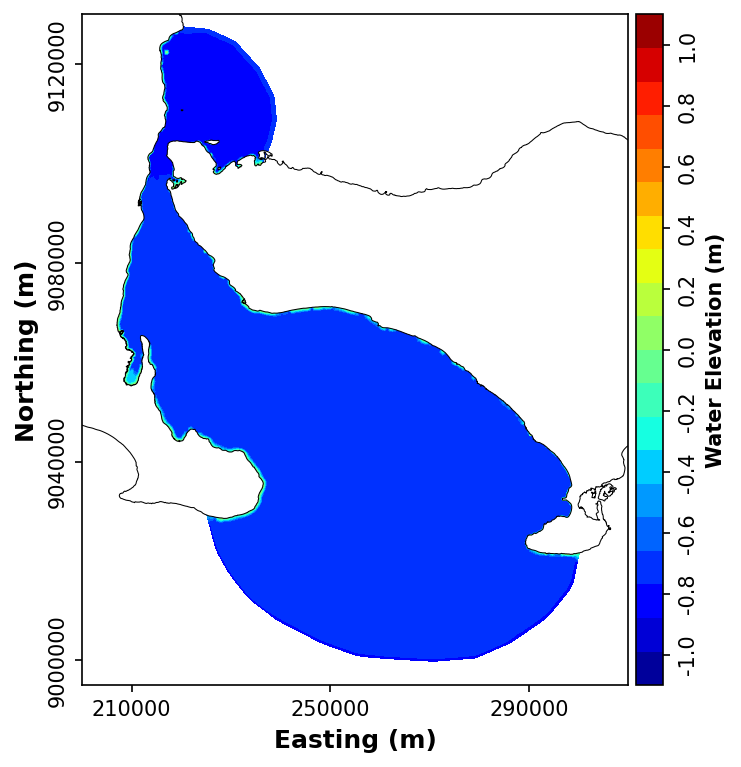

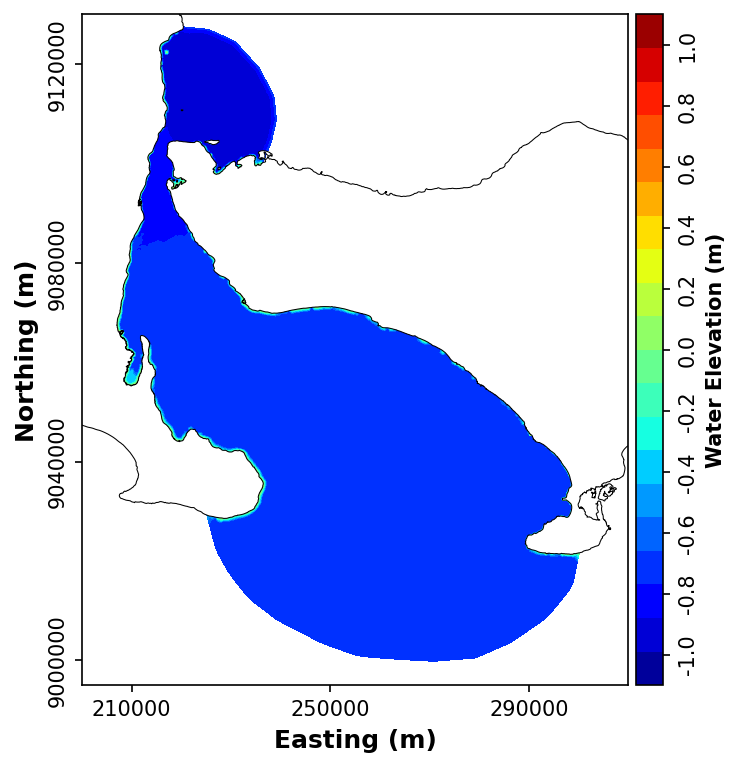

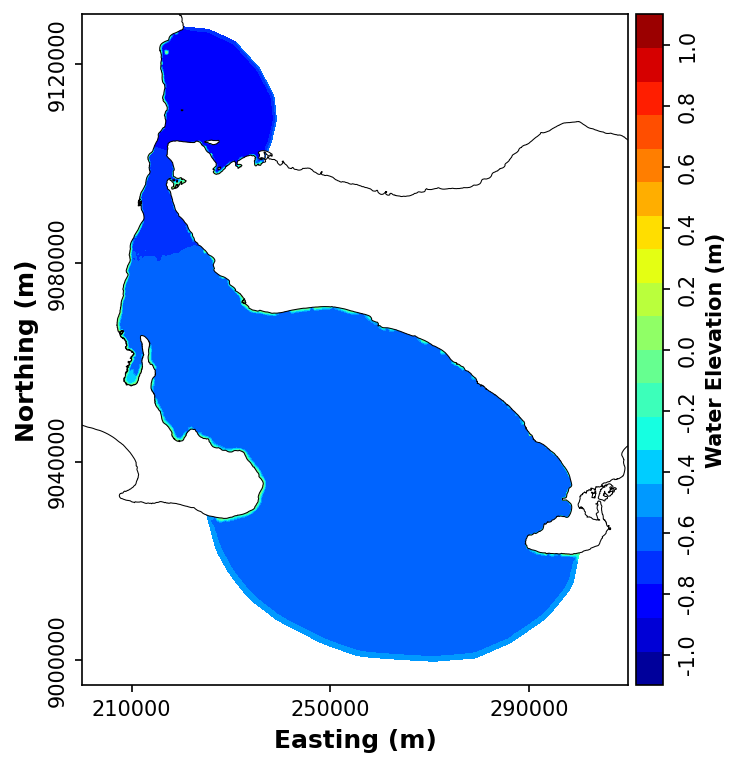

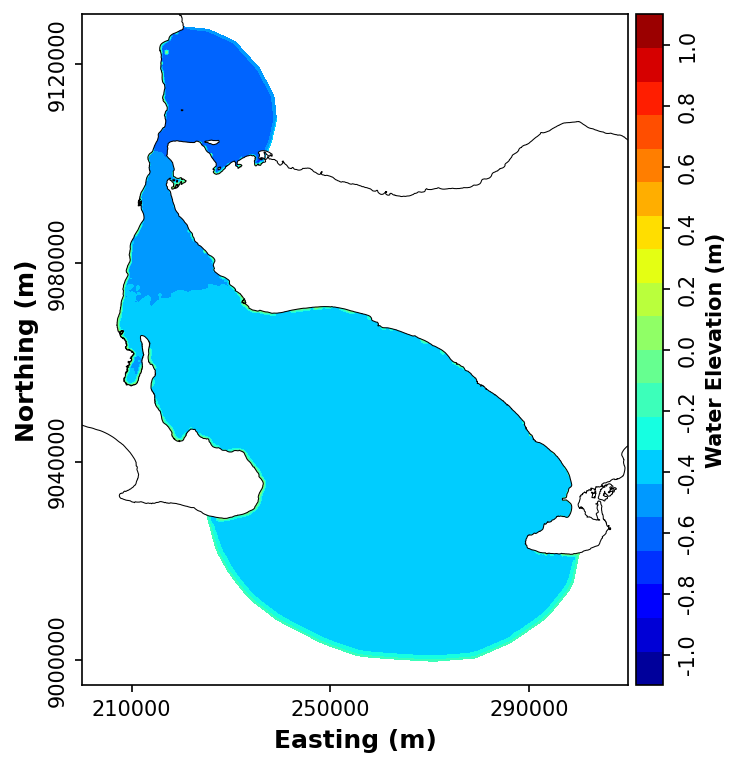

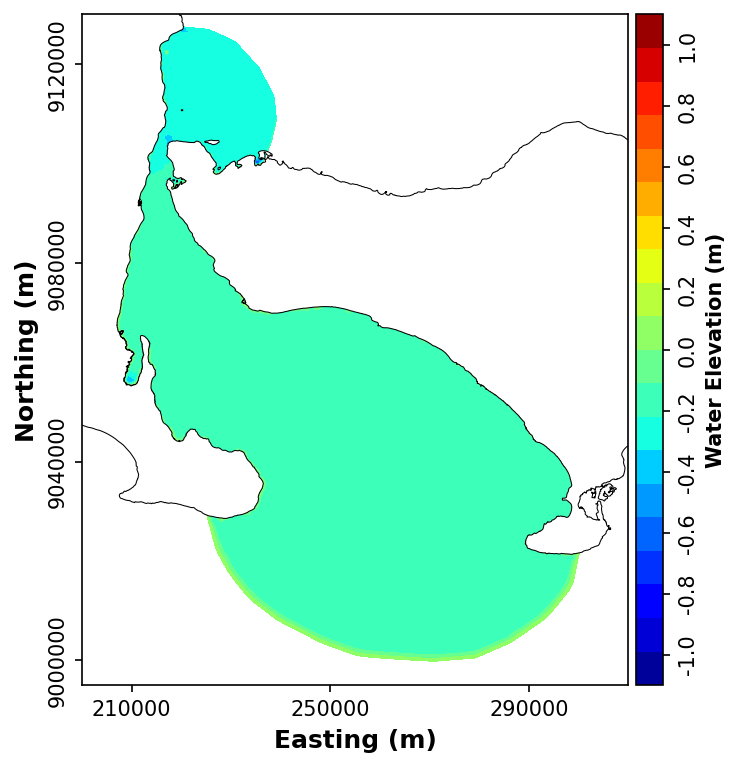

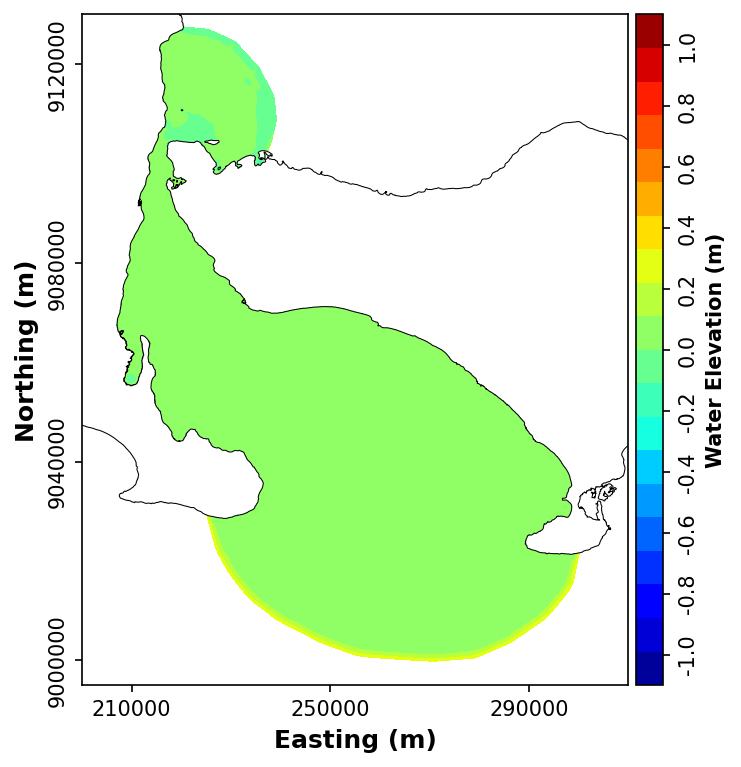

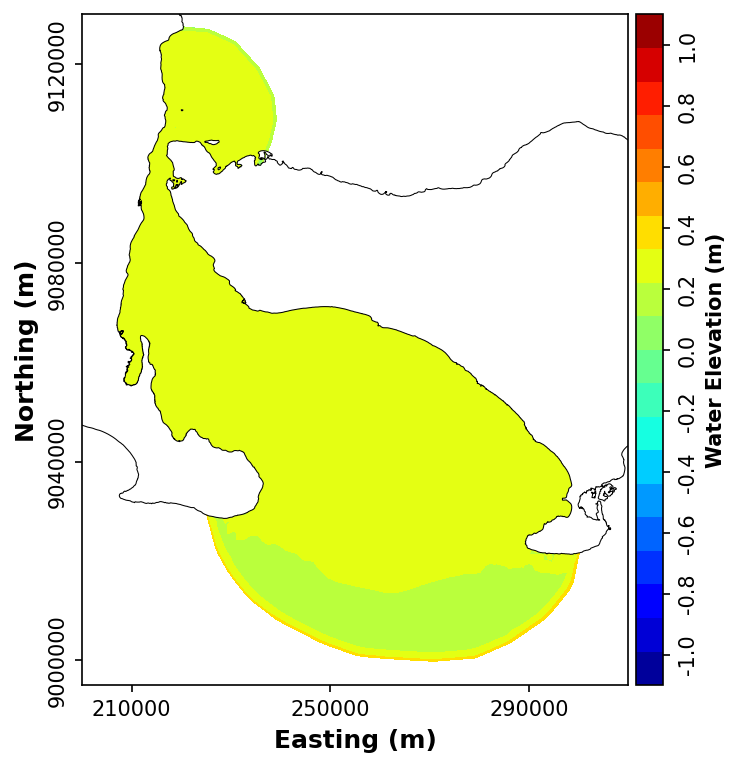

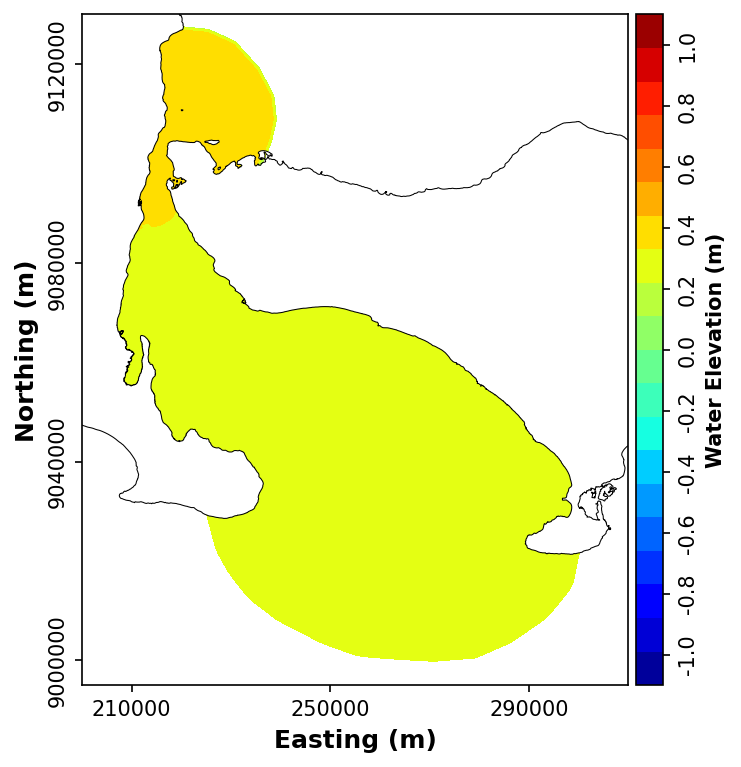

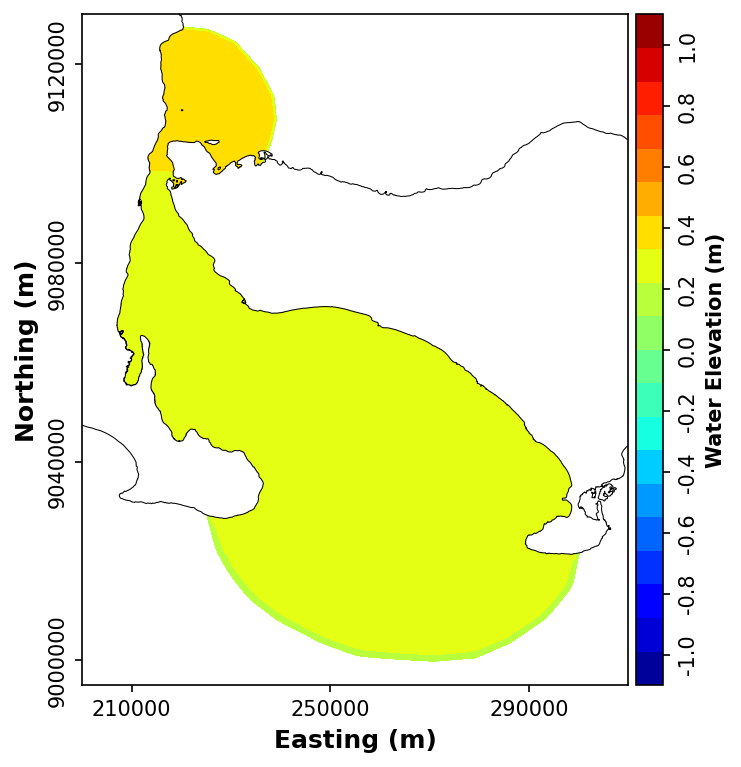

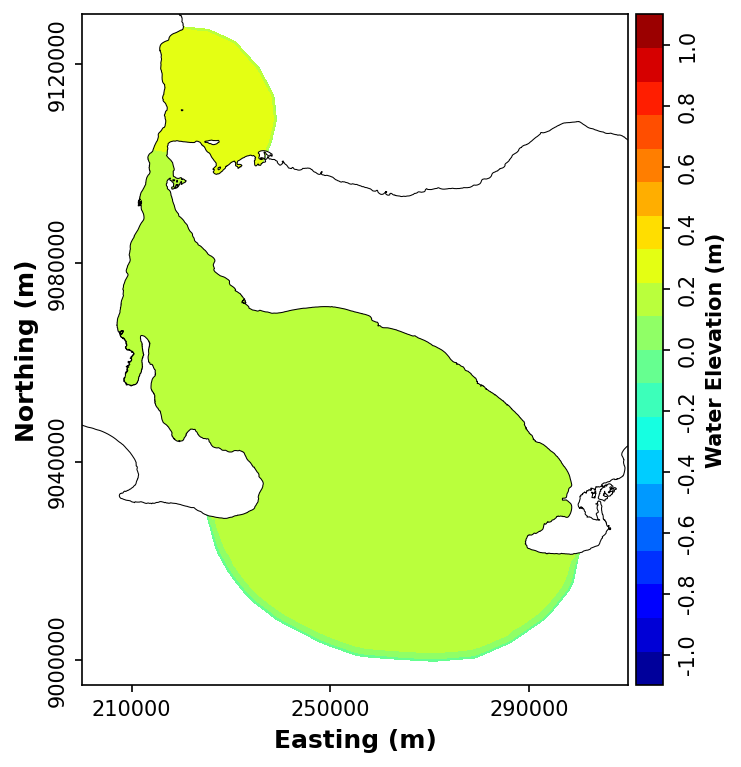

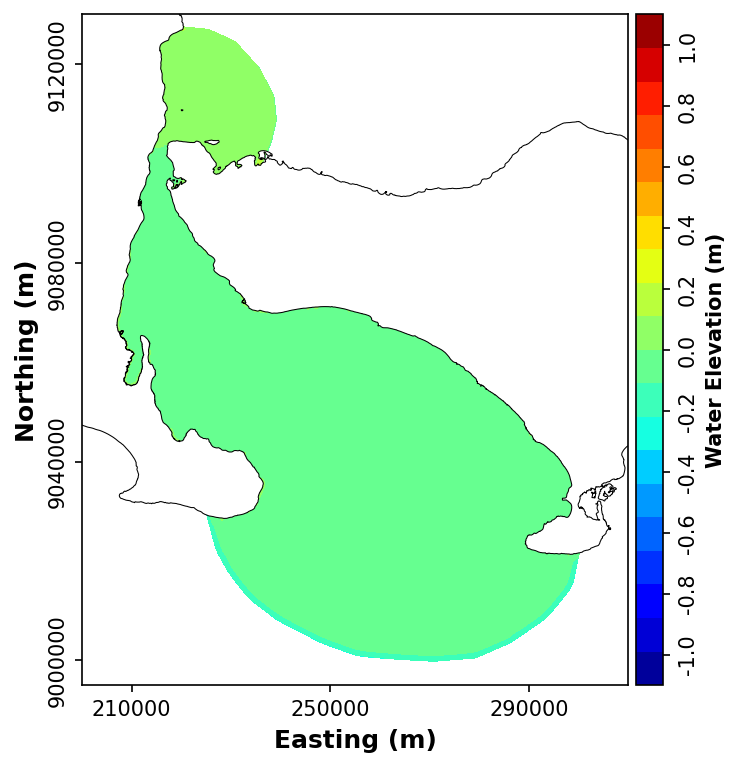

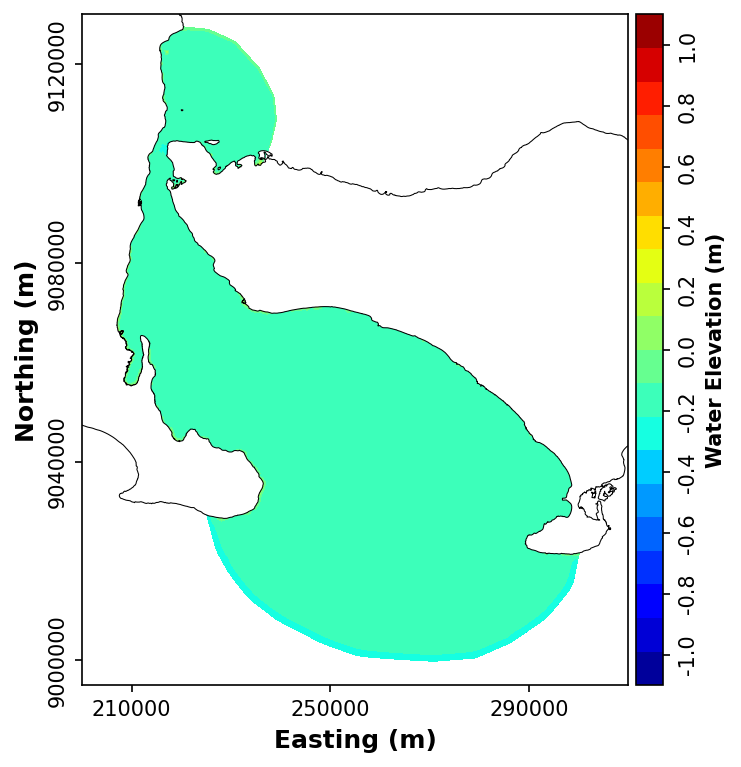

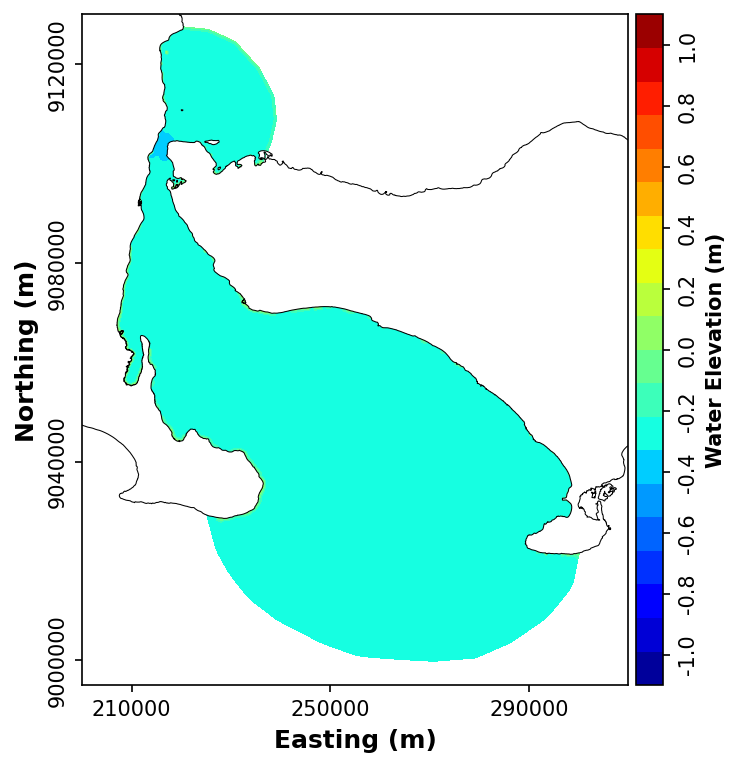

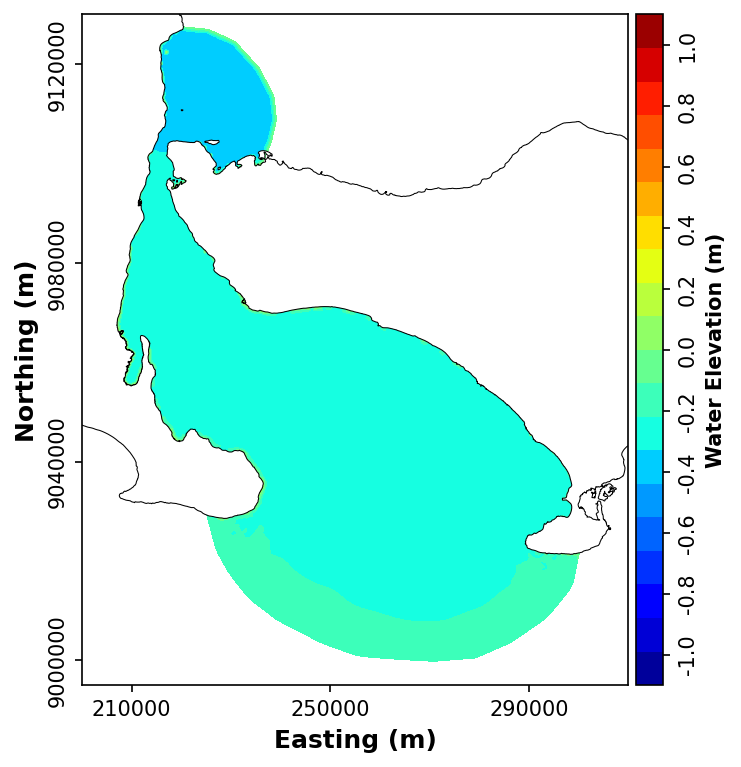

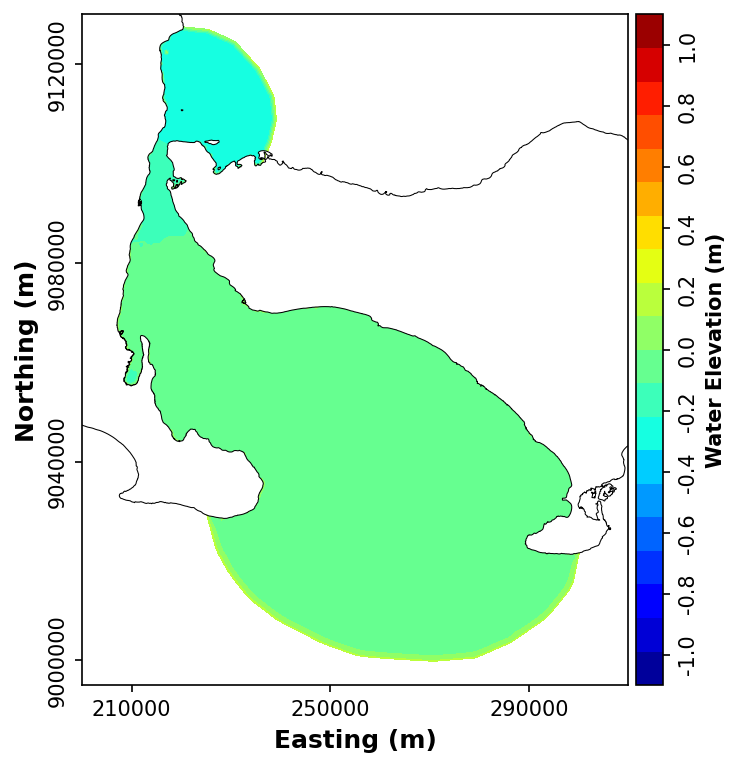

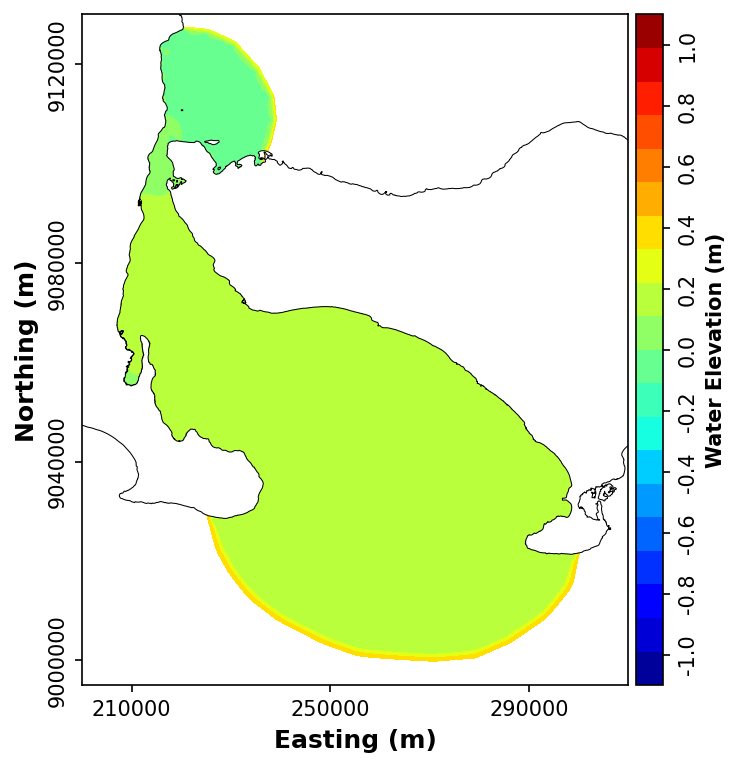

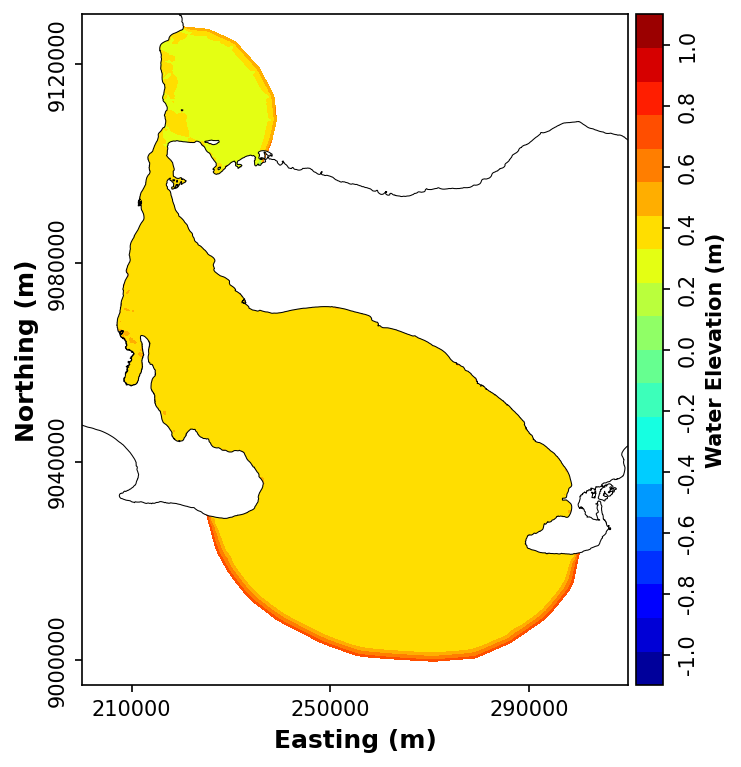

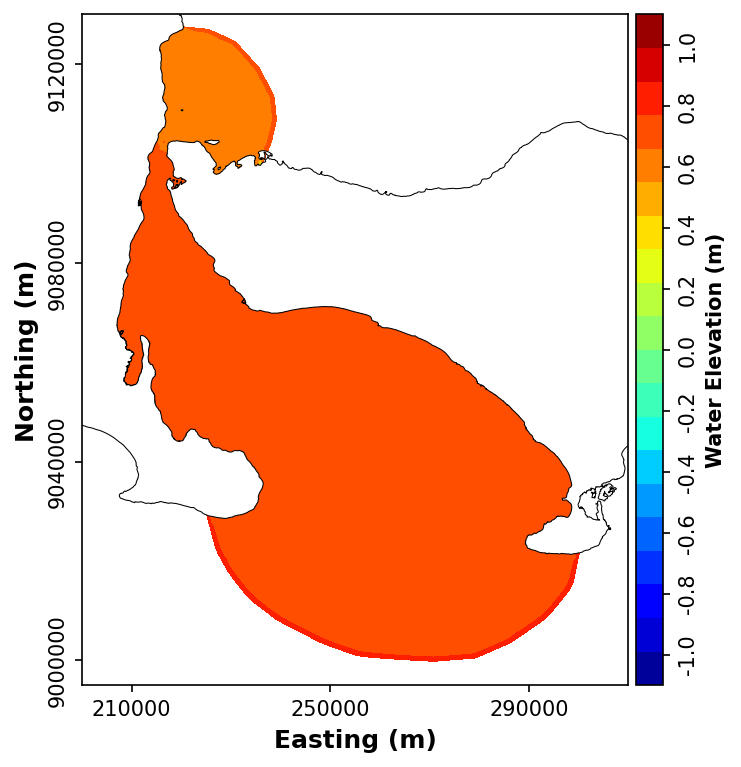

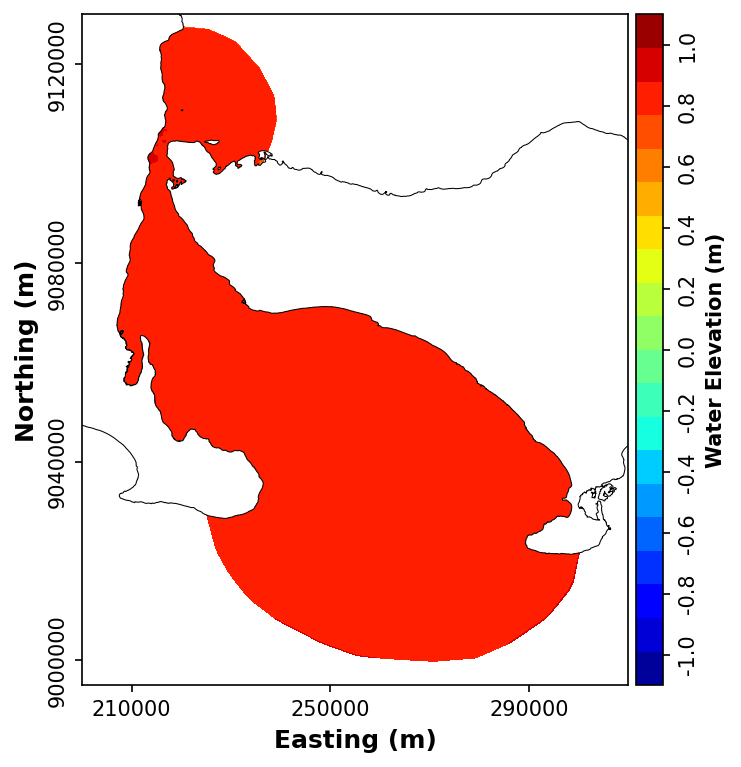

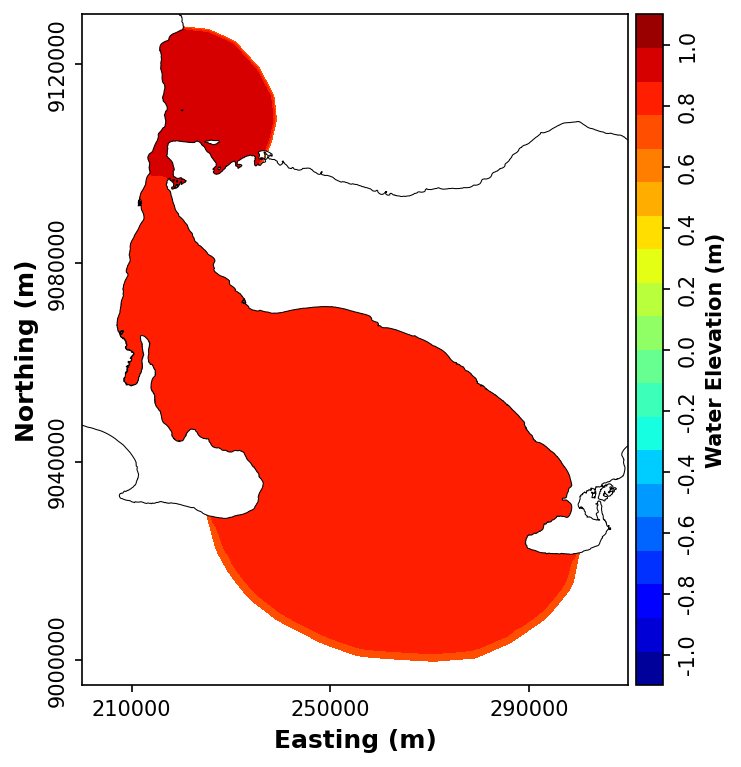

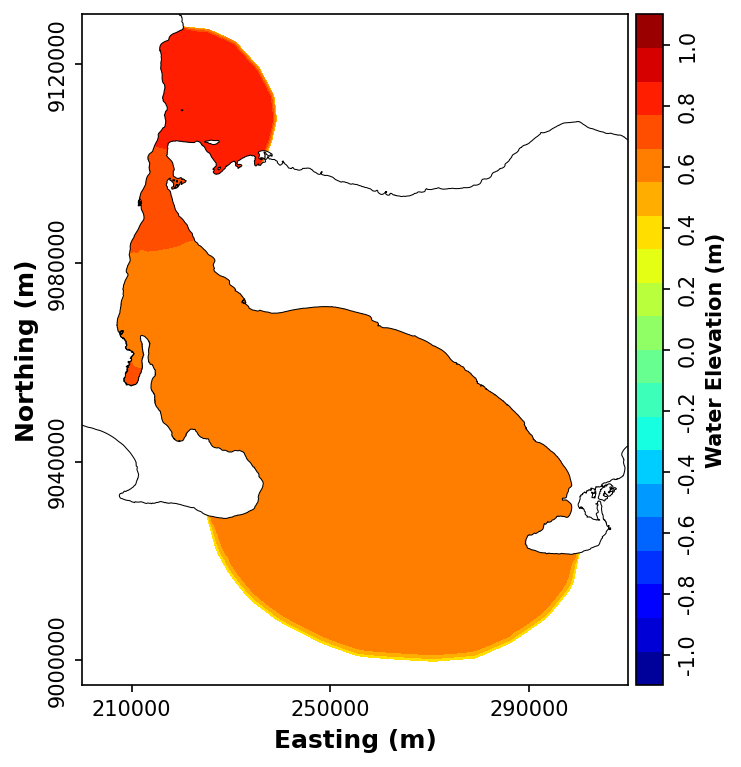

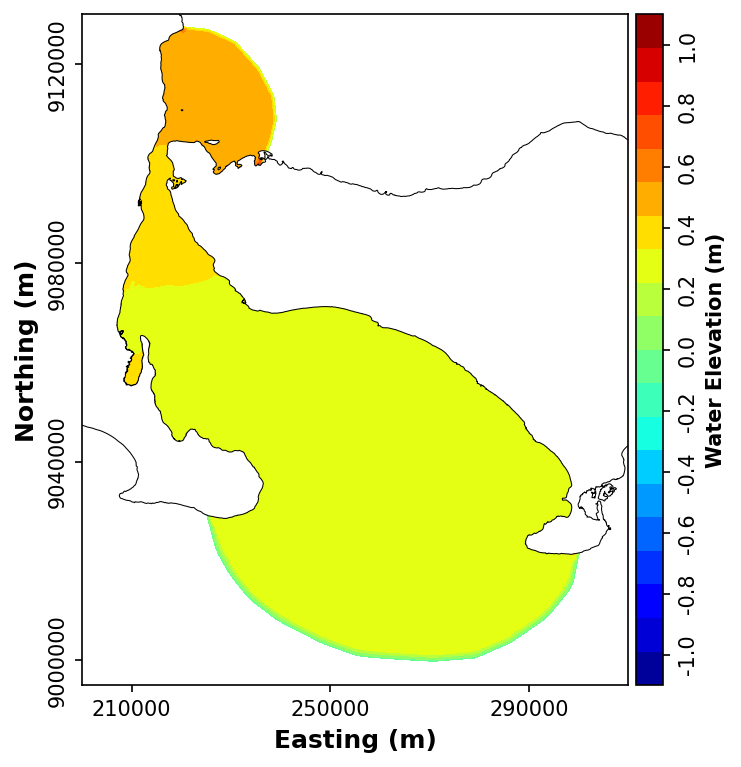

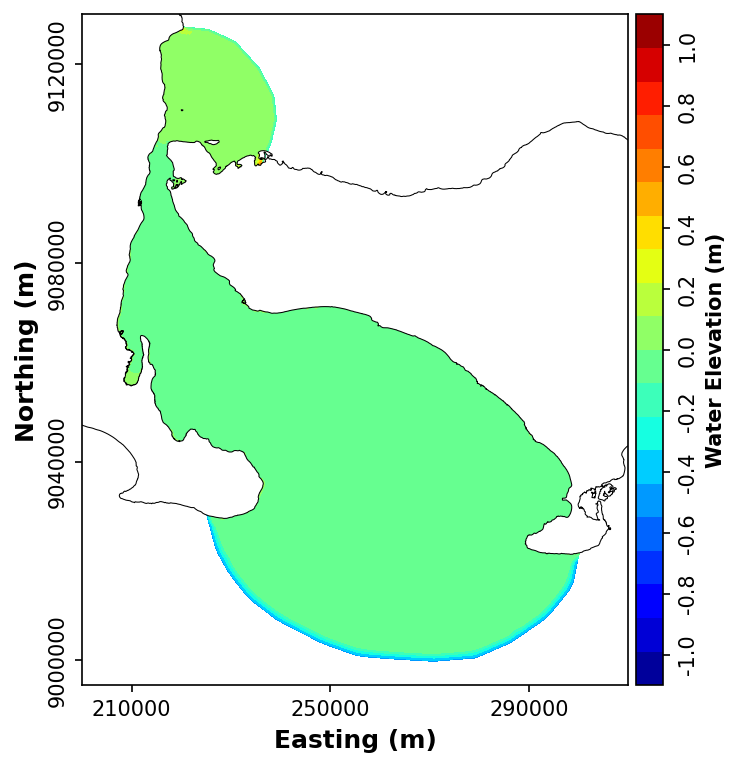

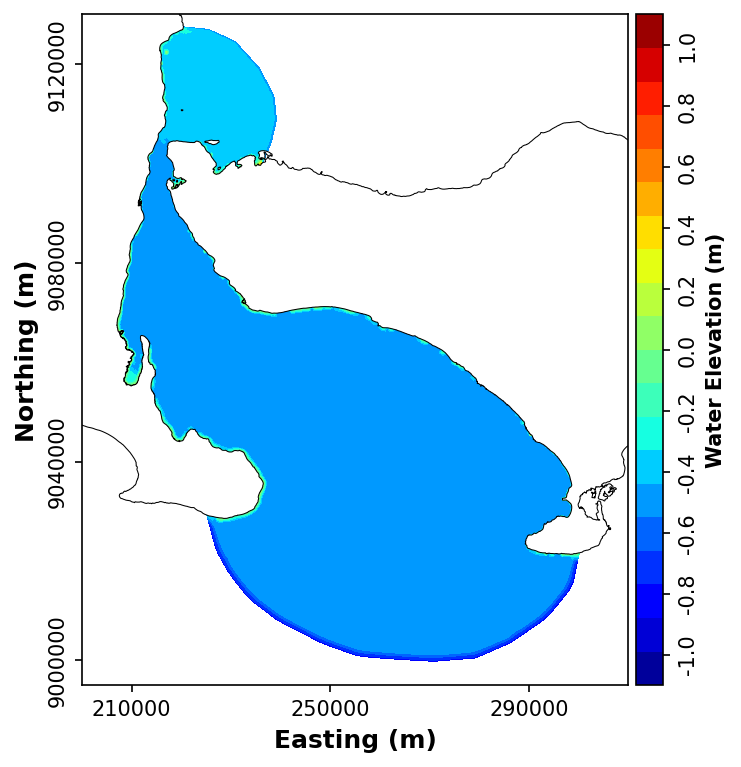

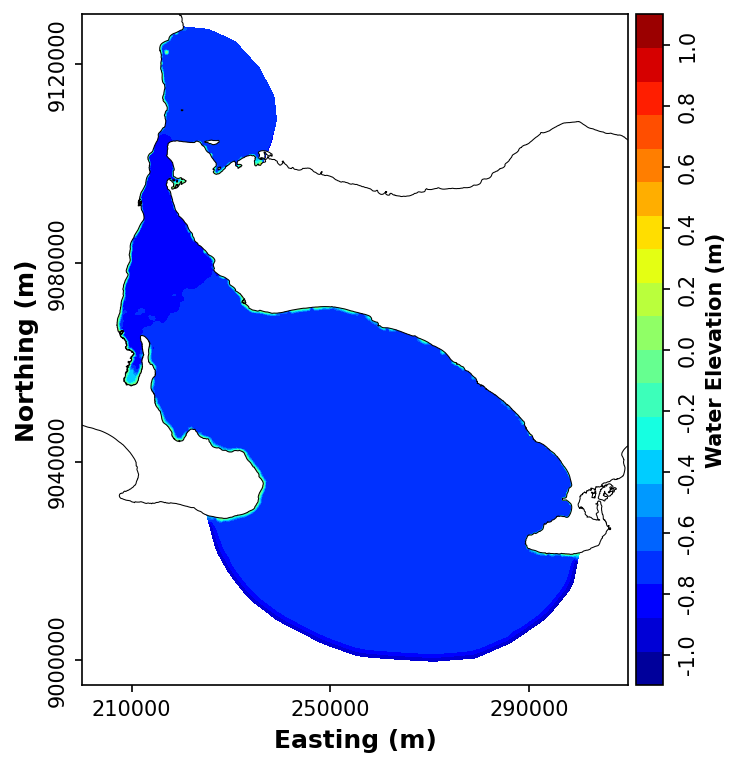

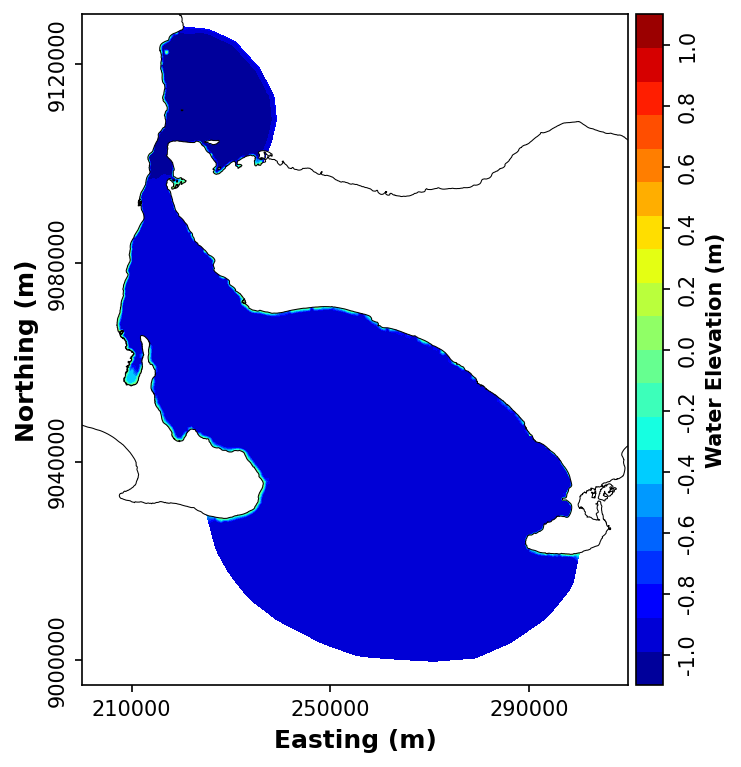

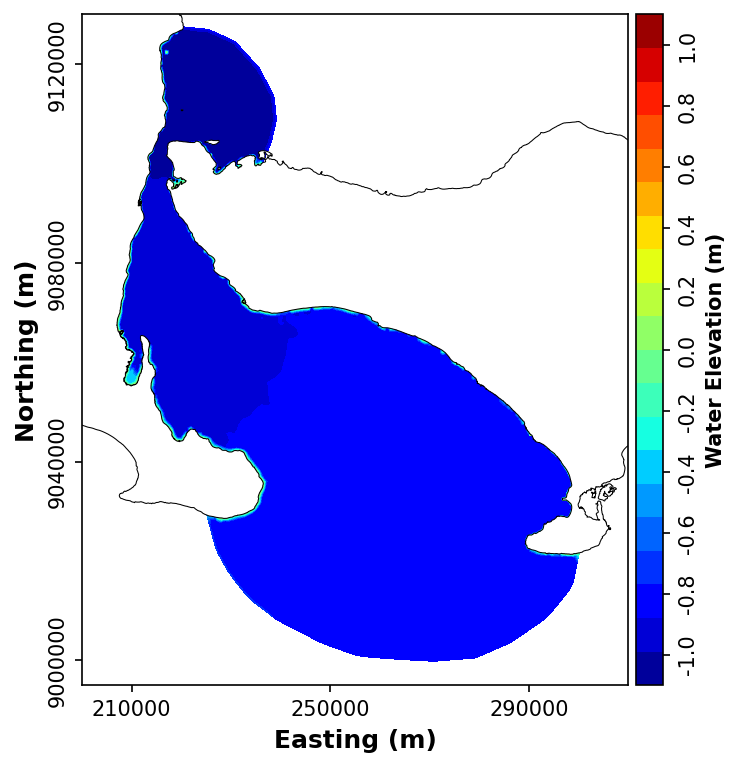

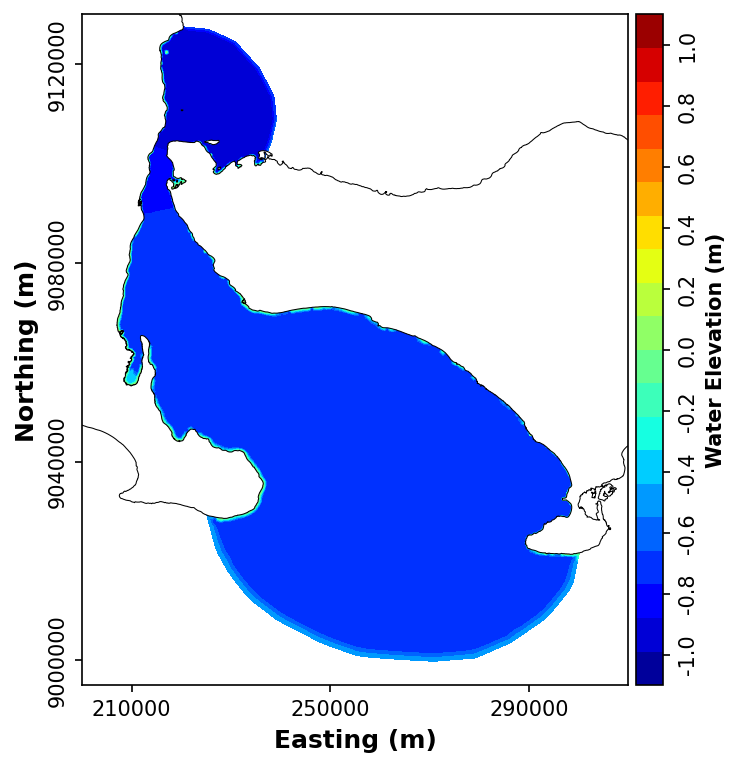

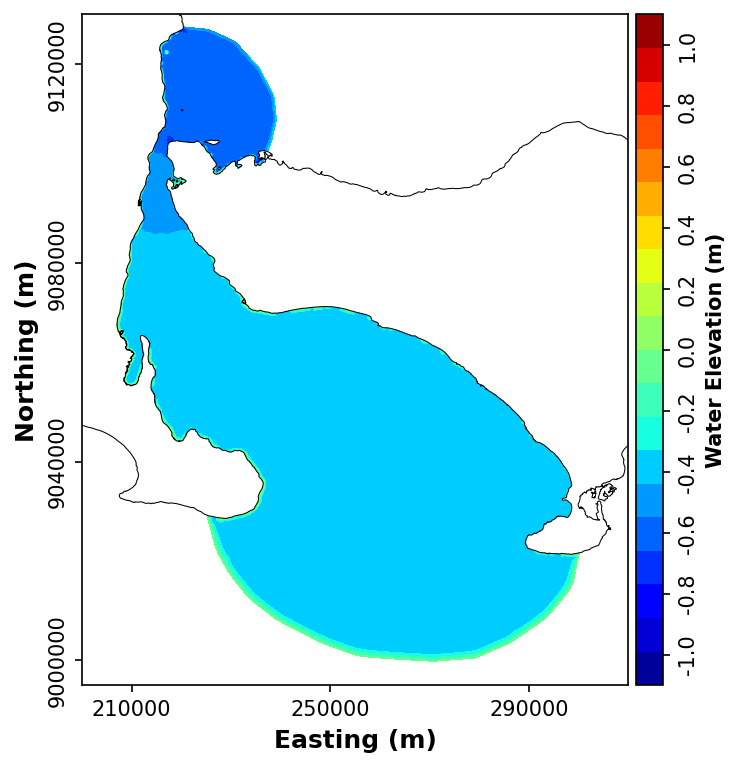

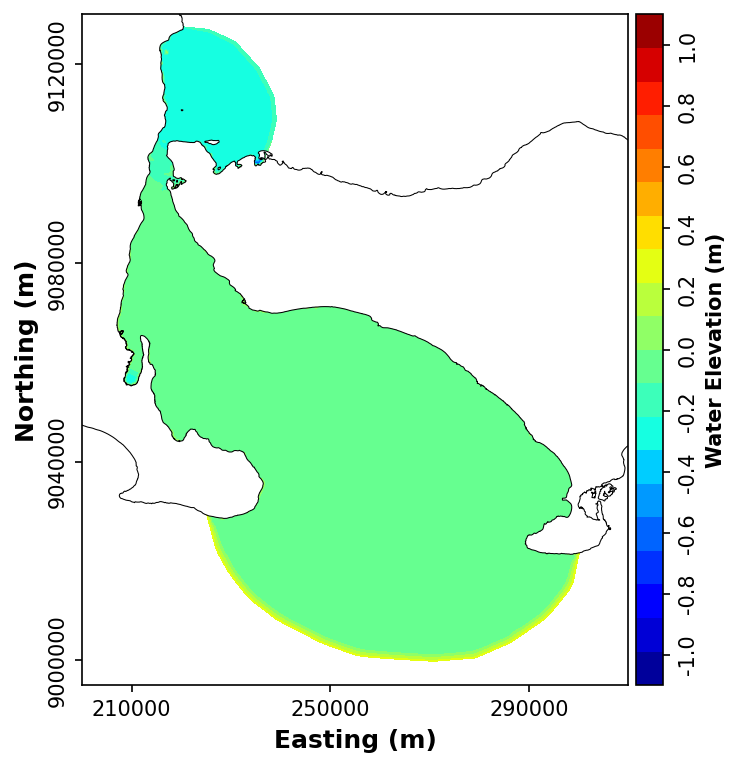

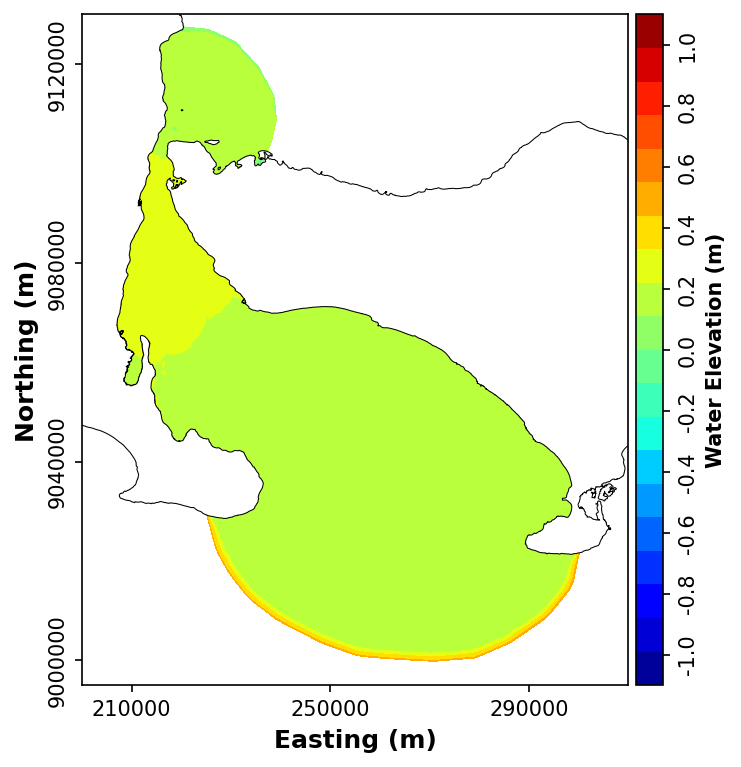

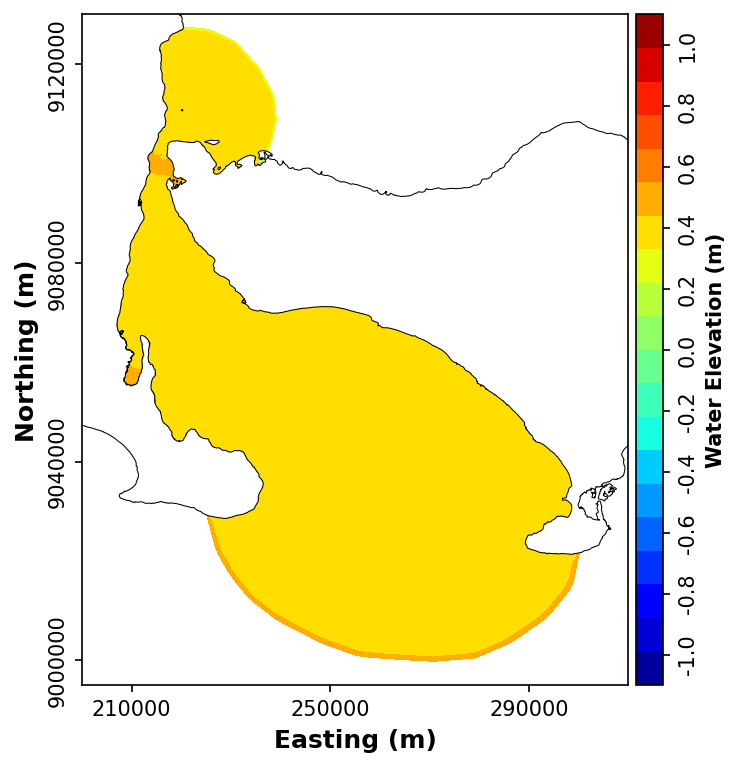

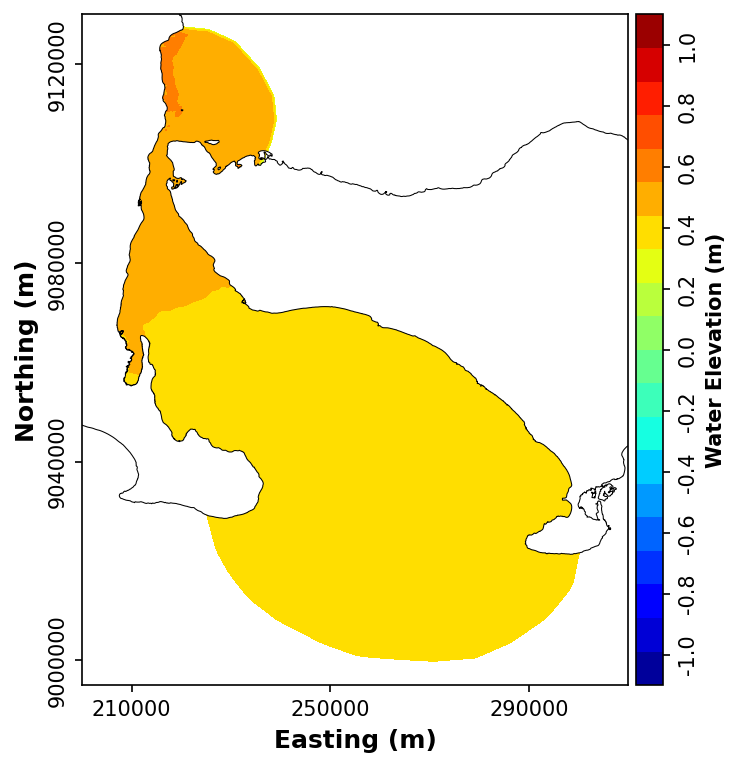

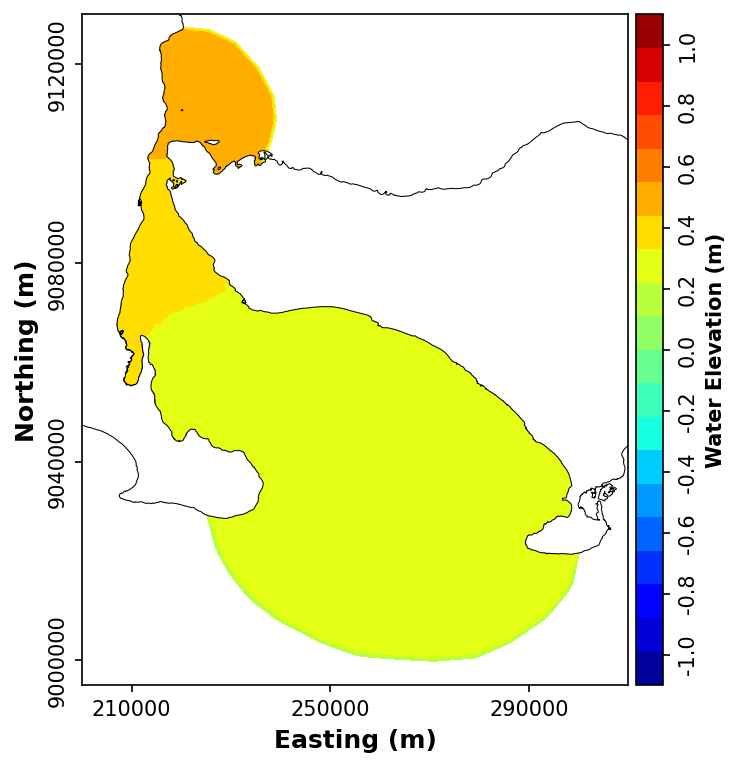

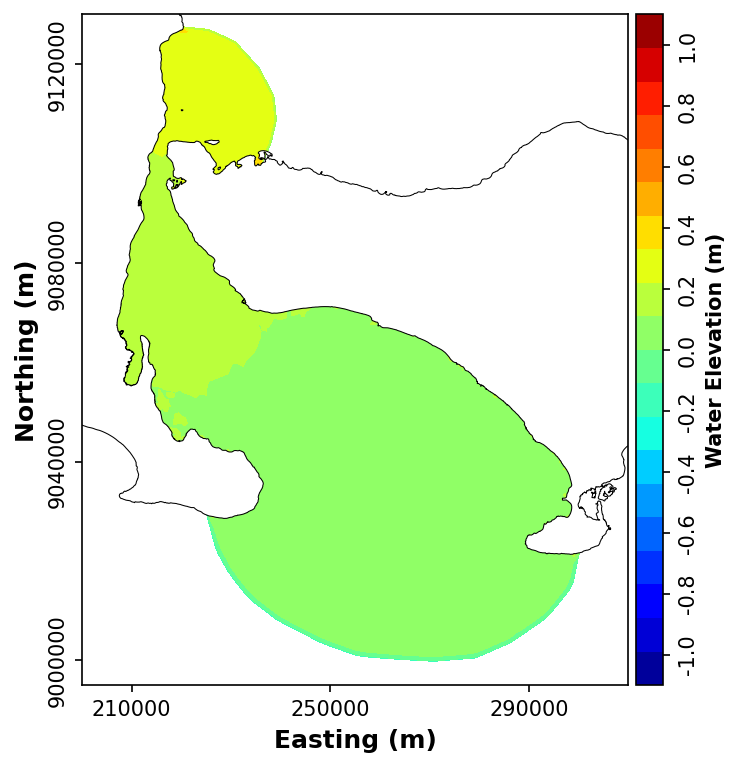

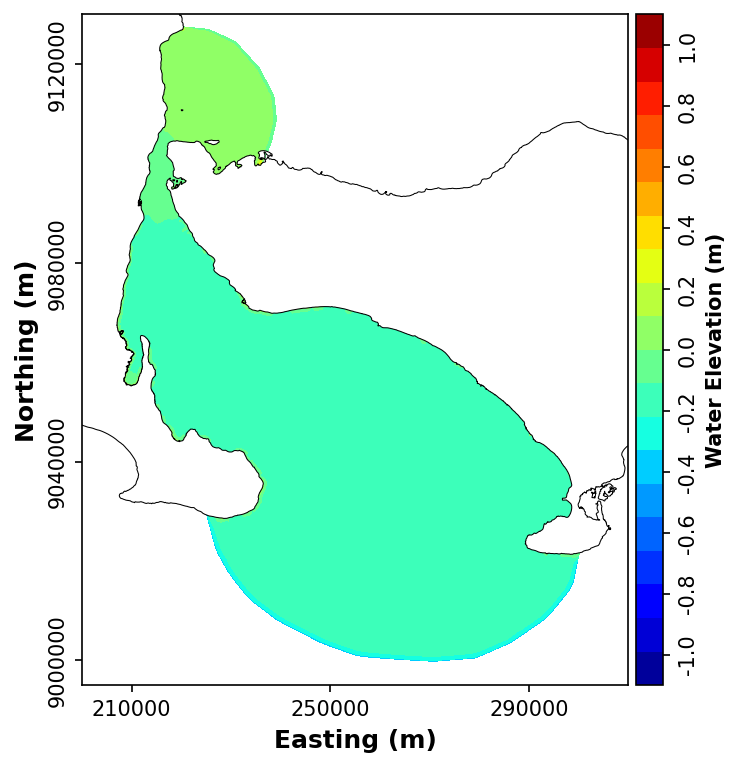

Figures Saved!


In [7]:
# place holder for images file name
filenames = []

# plot and save 100 water elevation data
for i in range(100):
    
    fig, ax = plt.subplots(figsize=(5,7), dpi=150)
    
    im = ax.tricontourf(triang, waterElevation[i], cmap='jet', levels=colorLevels)
    shpFile.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

    ax.set_xlim(200000, 310000)
    ax.set_ylim(8995000, 9130000)

    ax.set_xlabel('Easting (m)', fontweight='bold', fontsize=12)
    ax.set_ylabel('Northing (m)', fontweight='bold', fontsize=12)

    ax.set_xticks(ticks=[210000, 250000, 290000])
    ax.set_yticks(ticks=[9000000, 9040000, 9080000, 9120000])
    ax.set_yticklabels(ax.get_yticks(), rotation='vertical', va='center')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable=im, cax=cax)
    cbar.ax.set_yticks(ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
    cbar.ax.set_yticklabels(cbar.ax.get_yticks(), rotation='vertical', va='center')
    cbar.ax.set_ylabel('Water Elevation (m)', fontweight='bold')
    
    filename = f'images/figure {i+1}.png'          
    filenames.append(filename)
    fig.savefig(filename, bbox_inches='tight')

    plt.show()
    plt.close('all')
    
print('Figures Saved!')

In [8]:
filenames

['images/figure 1.png',
 'images/figure 2.png',
 'images/figure 3.png',
 'images/figure 4.png',
 'images/figure 5.png',
 'images/figure 6.png',
 'images/figure 7.png',
 'images/figure 8.png',
 'images/figure 9.png',
 'images/figure 10.png',
 'images/figure 11.png',
 'images/figure 12.png',
 'images/figure 13.png',
 'images/figure 14.png',
 'images/figure 15.png',
 'images/figure 16.png',
 'images/figure 17.png',
 'images/figure 18.png',
 'images/figure 19.png',
 'images/figure 20.png',
 'images/figure 21.png',
 'images/figure 22.png',
 'images/figure 23.png',
 'images/figure 24.png',
 'images/figure 25.png',
 'images/figure 26.png',
 'images/figure 27.png',
 'images/figure 28.png',
 'images/figure 29.png',
 'images/figure 30.png',
 'images/figure 31.png',
 'images/figure 32.png',
 'images/figure 33.png',
 'images/figure 34.png',
 'images/figure 35.png',
 'images/figure 36.png',
 'images/figure 37.png',
 'images/figure 38.png',
 'images/figure 39.png',
 'images/figure 40.png',
 'images/

In [10]:
# create the animation (.gif)!!!
with imageio.get_writer('myAnimation2.gif', fps=10) as writer:    # inputs: filename, frame per second
    for filename in filenames:
        image = imageio.imread(filename)                         # load the image file
        writer.append_data(image)                                # append the image file
print('Gif saved!\n')

Gif saved!



**THANK YOU**

Like, Comment and Subscribe